In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

import os, sys
sys.path.append("../")
import importlib
import random
import torchvision.transforms.functional as TF
from joblib import Parallel, delayed
import math

In [2]:
f1 = r"/Users/zhouziqi/Desktop/ColorCompensationSimulator/NucleusImage4.tif"
f2 = r"/Users/zhouziqi/Desktop/ColorCompensationSimulator/SpotImage.tif"
f3 = r"/Users/zhouziqi/Desktop/ColorCompensationSimulator/NucleusImage5.tif"
f4 = r"/Users/zhouziqi/Desktop/ColorCompensationSimulator/SpotImage4.tif"
f5 = r"/Users/zhouziqi/Desktop/ColorCompensationSimulator/SpotImage5.tif"

img1 = imread(f1).astype(np.single)
img2 = imread(f2).astype(np.single)
img3 = imread(f3).astype(np.single)
img4 = imread(f4).astype(np.single)
img5 = imread(f5).astype(np.single)

In [3]:
def add_noise_based_on_snr(image, desired_snr_db, seed):
    signal_power = np.mean(image ** 2)
    noise_power = signal_power / desired_snr_db

    mean = 0
    std = np.sqrt(noise_power)
    np.random.seed(seed)
    gaussian_noise = np.random.normal(mean, std, image.shape)

    noisy_image = image + gaussian_noise
    noisy_image_uint8 = np.uint8(np.clip(noisy_image, 0, 255))
    
    return noisy_image_uint8

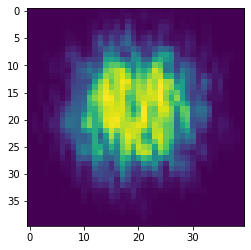

In [4]:
plt.imshow(img5[55:95, 53:93])
plt.show()

In [5]:
# new1 = np.zeros((100, 100))
# new2 = np.zeros((100, 100))
# new3 = np.zeros((100, 100))
# new4 = np.zeros((100, 100))
# new5 = np.zeros((100, 100))
# 
# pos1_1 = random.randint(0,45)
# pos1_2 = random.randint(0, 45)
# # print(pos1_1, pos1_2)
# new1[0 + pos1_1:55 + pos1_1, 0 + pos1_2:55 + pos1_2] = img1[15:70, 15:70]
# pos2_1 = random.randint(0, 18)
# pos2_2 = random.randint(0, 18)
# # print(pos2_1, pos2_2)
# new2[0 + pos2_1:55 + pos2_1, 0 + pos2_2:55 + pos2_2] = img2[45:100, 25:80]
# pos3_1 = random.randint(0, 27)
# pos3_2 = random.randint(0, 27)
# # print(pos3_1, pos3_2)
# new3[5 + pos3_1:60 + pos3_1, 0 + pos3_2:55 + pos3_2] = img3[15:70, 30:85]
# pos4_1 = random.randint(0, 36)
# pos4_2 = random.randint(0, 36)
# # print(pos4_1, pos4_2)
# new4[0 + pos4_1:55 + pos4_1, 0 + pos4_2:55 + pos4_2] = img4[45:100, 45:100]
# pos5_1 = random.randint(0, 25)
# pos5_2 = random.randint(0, 45)
# # print(pos5_1, pos5_2)
# new5[0 + pos5_1:55 + pos5_1, 0 + pos5_2:55 + pos5_2] = img5[0:55, 15:70]
# 
# plt.figure(figsize=(10, 10))
# plt.imshow(new1 + new2 + new3 + new4 + new5)
# plt.show()

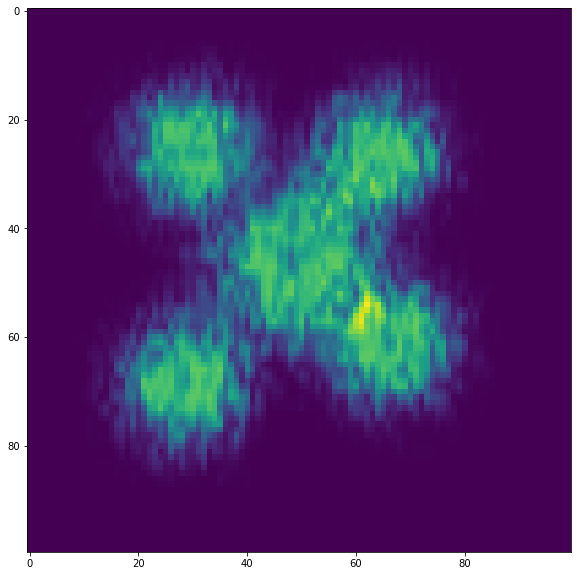

In [6]:
new1 = np.zeros((100, 100))
new2 = np.zeros((100, 100))
new3 = np.zeros((100, 100))
new4 = np.zeros((100, 100))
new5 = np.zeros((100, 100))

pos1_1 = random.randint(0, 15)
pos1_2 = random.randint(0, 15)
new1[pos1_1:40 + pos1_1, pos1_2:40 + pos1_2] = img1[23:63, 30:70]
# pos2_1 = random.randint(0, 45)
pos2_1 = random.randint(0, 35)
# pos2_1 = 0
new2[pos2_1:55 + pos2_1, 20:75] = img2[45:100, 25:80]
pos3_1 = random.randint(0, 15)
pos3_2 = random.randint(0, 15)
new3[pos3_1:40 + pos3_1, 40 + pos3_2:80 + pos3_2] = img3[23:63, 35:75]
pos4_1 = random.randint(0, 20)
pos4_2 = random.randint(0, 25)
new4[40 + pos4_1:80 + pos4_1, pos4_2:40 + pos4_2] = img4[33:73, 60:100]
pos5_1 = random.randint(0, 20)
pos5_2 = random.randint(0, 20)
new5[40 + pos5_1:80 + pos5_1, 40 + pos5_2:80 + pos5_2] = img5[55:95, 53:93]

plt.figure(figsize=(10, 10))
plt.imshow(new1 + new2 + new3 + new4 + new5)
plt.show()

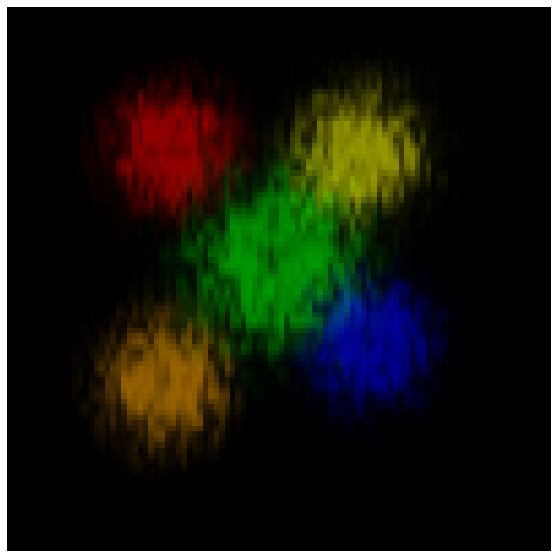

In [7]:
rgb_img = np.zeros((100, 100, 3))
rgb_img[:,:,0] = new1
rgb_img[:,:,1] = new2
rgb_img[:,:,2] = new5

# rgb_img = np.uint8(rgb_img)

yellow_ch = np.zeros((100, 100, 3))
yellow_ch[:,:,0] = new3
yellow_ch[:,:,1] = new3

# yellow_ch = np.uint8(yellow_ch)

orange_ch = np.zeros((100, 100, 3))
orange_ch[:,:,0] = new4
orange_ch[:,:,1] = new4 * 0.65

# orange_ch = np.uint8(orange_ch)

overlapped_img = rgb_img + yellow_ch + orange_ch
overlapped_img[overlapped_img > 255] = 255
overlapped_img = np.uint8(overlapped_img)
plt.figure(figsize=(10, 10))
plt.imshow(overlapped_img)
# plt.title("Overlapped Image with Five Channels", size=20)
plt.axis('off')
plt.show()

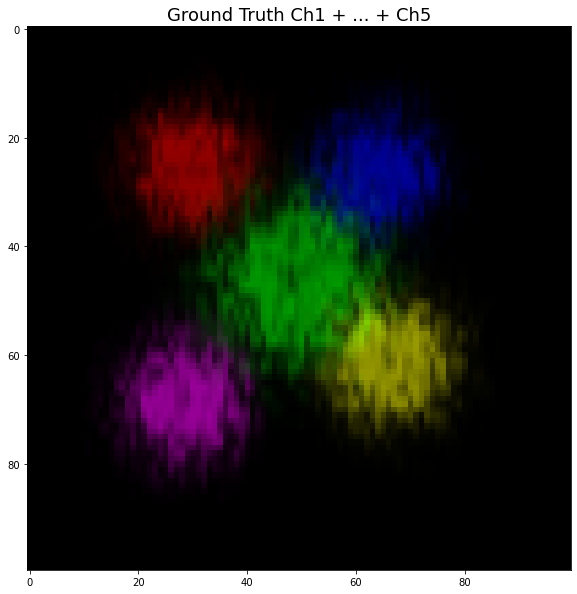

In [8]:
measured_img1 = new1 + 0.4 * new2 + 0.3 * new3 + 0.2 * new4 + 0.1 * new5
measured_img2 = 0.4 * new1 + new2 + 0.4 * new3 + 0.3 * new4 + 0.2 * new5
measured_img3 = 0.3 * new1 + 0.3 * new2 + new3 + 0.4 * new4 + 0.3 * new5
measured_img4 = 0.2 * new1 + 0.2 * new2 + 0.3 * new3 + new4 + 0.4 * new5
measured_img5 = 0.1 * new1 + 0.1 * new2 + 0.2 * new3 + 0.4 * new4 + new5

red_channel = np.zeros((100, 100, 3), dtype=np.uint8)
red_channel[:,:,0] = np.uint8(new1)

green_channel = np.zeros((100, 100, 3), dtype=np.uint8)
green_channel[:,:,1] = np.uint8(new2)

blue_channel = np.zeros((100, 100, 3), dtype=np.uint8)
blue_channel[:,:,2] = np.uint8(new3)

overlap = np.zeros((100, 100, 3))
overlap[:,:,0] = np.uint8(new1 + new4 + new5)
overlap[:,:,1] = np.uint8(new2 + new5)
overlap[:,:,2] = np.uint8(new3 + new4)
overlap[overlap > 255] = 255
overlap = np.uint8(overlap)

plt.figure(figsize=(10, 10))
plt.imshow(overlap)
plt.title("Ground Truth Ch1 + ... + Ch5", size = 18)
plt.show()

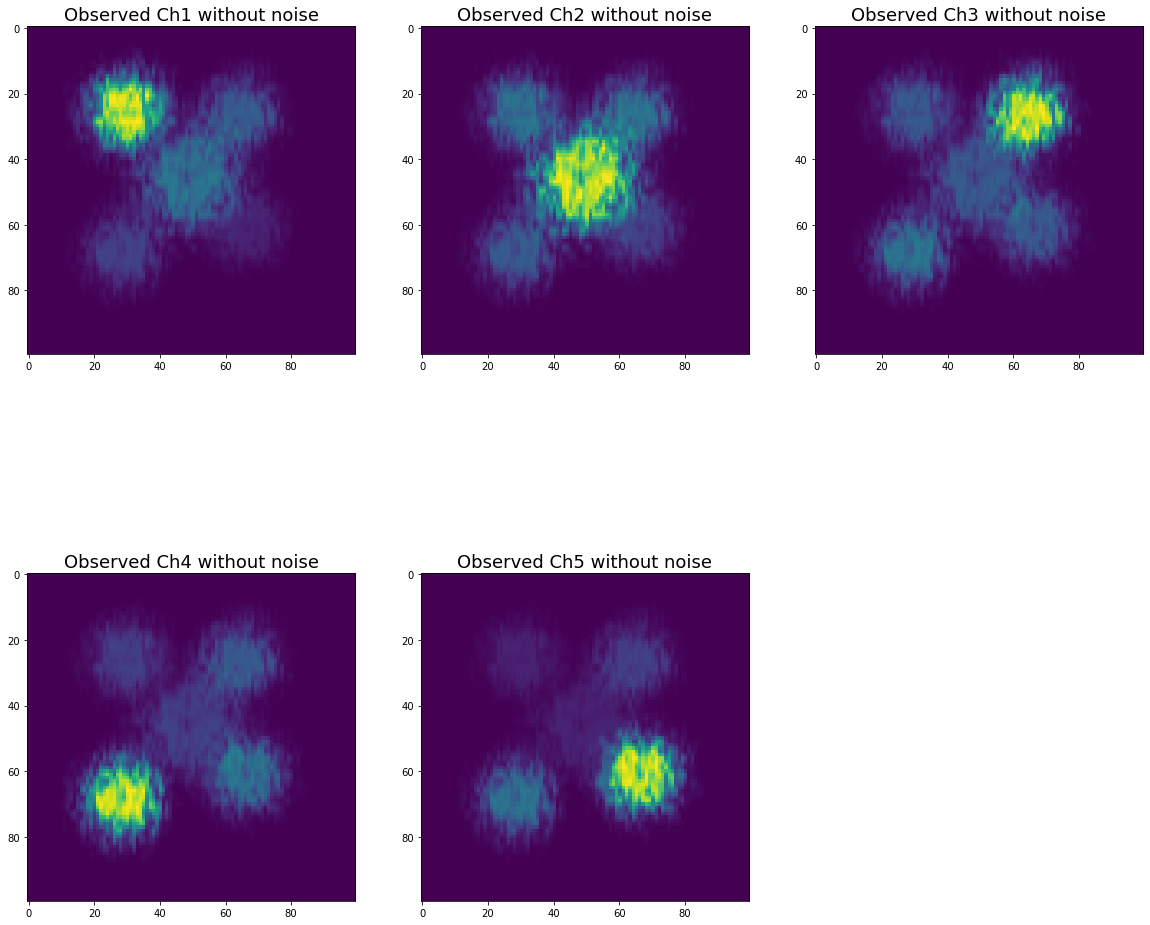

In [9]:
IMG = [measured_img1, measured_img2, measured_img3, measured_img4, measured_img5]

fig, ax = plt.subplots(2, 3, figsize = (20, 20))
plt.subplots_adjust(hspace=0.01)

for i in range(5):
    row = i//3
    col = i % 3
    ax[row][col].imshow(IMG[i])
    ax[row][col].set_title(f'Observed Ch{i + 1} without noise', size = 18)

fig.delaxes(ax[1][2])
plt.show()

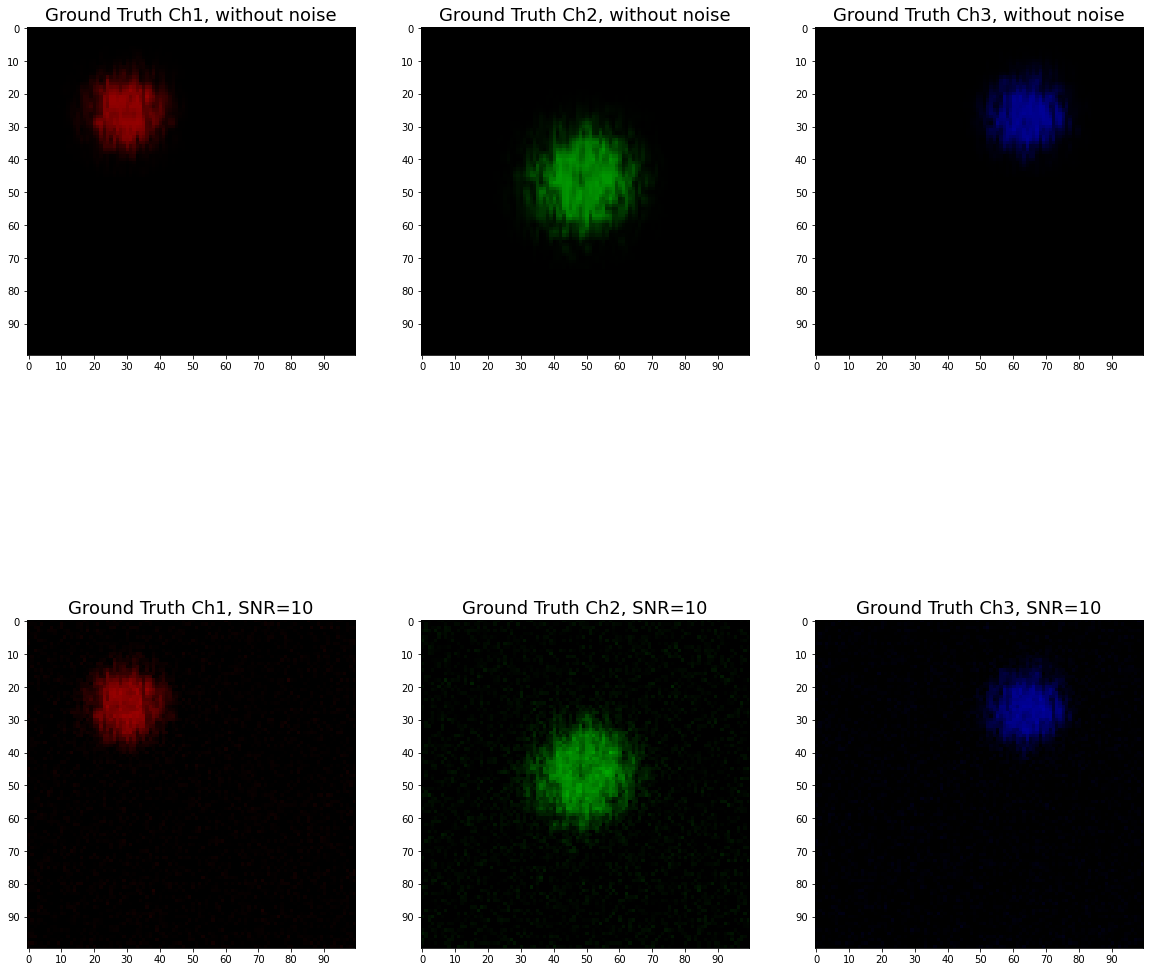

In [10]:
new1_noise = add_noise_based_on_snr(new1, 10, 4).astype(np.single)
new2_noise = add_noise_based_on_snr(new2, 10, 20).astype(np.single)
new3_noise = add_noise_based_on_snr(new3, 10, 33).astype(np.single)
new4_noise = add_noise_based_on_snr(new4, 10, 345).astype(np.single)
new5_noise = add_noise_based_on_snr(new5, 10, 425).astype(np.single)

red_noise = np.zeros((100, 100, 3), dtype=np.uint8)
red_noise[:,:,0] = np.uint8(new1_noise)

green_noise = np.zeros((100, 100, 3), dtype=np.uint8)
green_noise[:,:,1] = np.uint8(new2_noise)

blue_noise = np.zeros((100, 100, 3), dtype=np.uint8)
blue_noise[:,:,2] = np.uint8(new3_noise)

plt.figure(figsize=(20, 20))
plt.subplot(231)
plt.imshow(red_channel)
plt.xticks(np.arange(0, 100, 10))
plt.yticks(np.arange(0, 100, 10))
# plt.grid("on")
plt.title("Ground Truth Ch1, without noise", size = 18)
plt.subplot(232)
plt.imshow(green_channel)
plt.xticks(np.arange(0, 100, 10))
plt.yticks(np.arange(0, 100, 10))
# plt.grid("on")
plt.title("Ground Truth Ch2, without noise", size = 18)
plt.subplot(233)
plt.imshow(blue_channel)
plt.xticks(np.arange(0, 100, 10))
plt.yticks(np.arange(0, 100, 10))
# plt.grid("on")
plt.title("Ground Truth Ch3, without noise", size = 18)
plt.subplot(234)
plt.imshow(red_noise)
plt.xticks(np.arange(0, 100, 10))
plt.yticks(np.arange(0, 100, 10))
# plt.grid("on")
plt.title("Ground Truth Ch1, SNR=10", size = 18)
plt.subplot(235)
plt.imshow(green_noise)
plt.xticks(np.arange(0, 100, 10))
plt.yticks(np.arange(0, 100, 10))
# plt.grid("on")
plt.title("Ground Truth Ch2, SNR=10", size = 18)
plt.subplot(236)
plt.imshow(blue_noise)
plt.xticks(np.arange(0, 100, 10))
plt.yticks(np.arange(0, 100, 10))
# plt.grid("on")
plt.title("Ground Truth Ch3, SNR=10", size = 18)
plt.show()

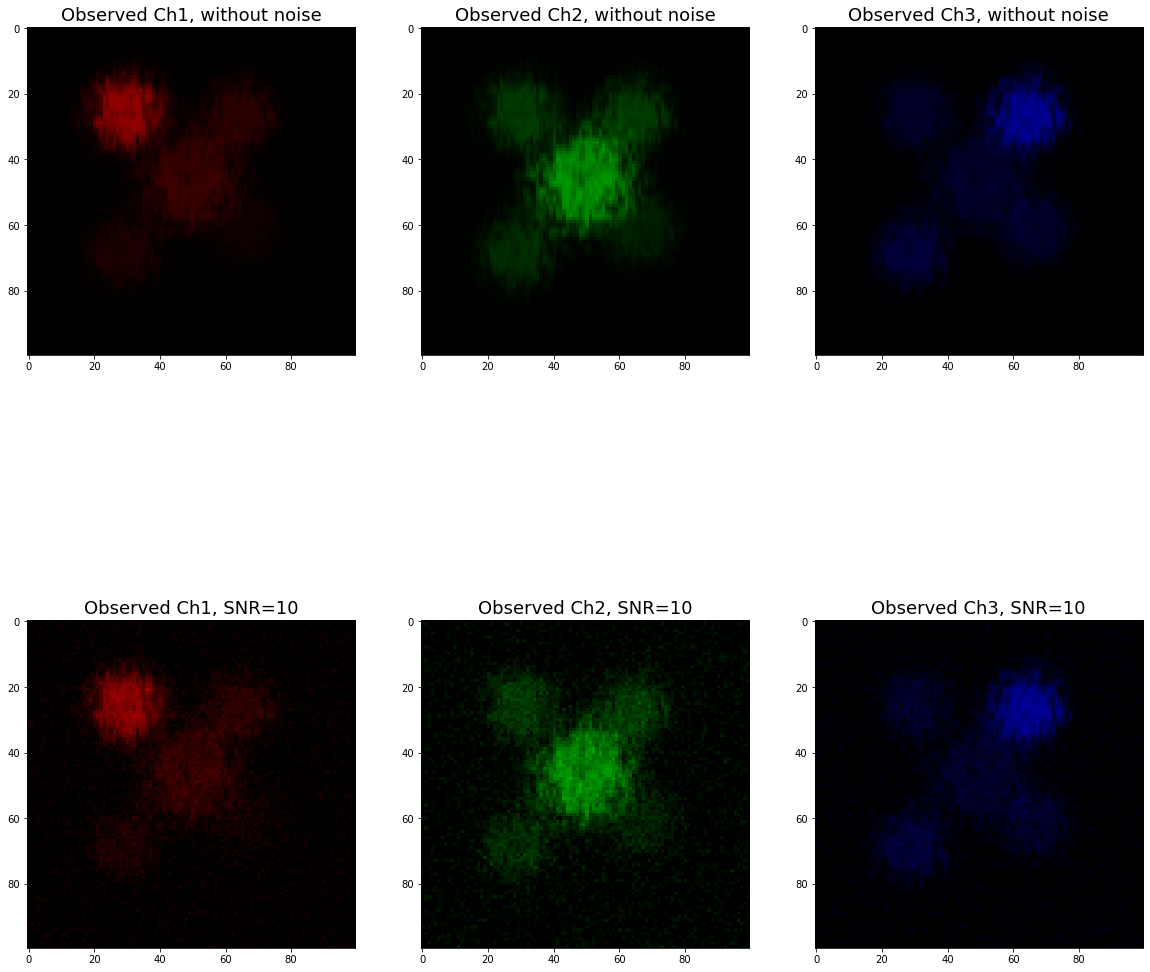

In [11]:
img1_noise = add_noise_based_on_snr(measured_img1, 10, 32).astype(np.single) #seed = 12
img1_noise[img1_noise > 255.0] = 255.0
img2_noise = add_noise_based_on_snr(measured_img2, 10, 23).astype(np.single) #seed = 20
img2_noise[img2_noise > 255.0] = 255.0
img3_noise = add_noise_based_on_snr(measured_img3, 10, 33).astype(np.single)
img3_noise[img3_noise > 255.0] = 255.0
img4_noise = add_noise_based_on_snr(measured_img4, 10, 2).astype(np.single) #seed = 20
img4_noise[img4_noise > 255.0] = 255.0
img5_noise = add_noise_based_on_snr(measured_img5, 10, 3).astype(np.single)
img5_noise[img5_noise > 255.0] = 255.0

red_overlap = np.zeros((100, 100, 3), dtype=np.uint8)
red_overlap[:,:,0] = np.uint8(measured_img1)

green_overlap = np.zeros((100, 100, 3), dtype=np.uint8)
green_overlap[:,:,1] = np.uint8(measured_img2)

blue_overlap = np.zeros((100, 100, 3), dtype=np.uint8)
blue_overlap[:,:,2] = np.uint8(measured_img3)

red_noise_overlap = np.zeros((100, 100, 3), dtype=np.uint8)
red_noise_overlap[:,:,0] = np.uint8(img1_noise)

green_noise_overlap = np.zeros((100, 100, 3), dtype=np.uint8)
green_noise_overlap[:,:,1] = np.uint8(img2_noise)

blue_noise_overlap = np.zeros((100, 100, 3), dtype=np.uint8)
blue_noise_overlap[:,:,2] = np.uint8(img3_noise)

plt.figure(figsize=(20, 20))
plt.subplot(231)
plt.imshow(red_overlap)
plt.title("Observed Ch1, without noise", size = 18)
plt.subplot(232)
plt.imshow(green_overlap)
plt.title("Observed Ch2, without noise", size = 18)
plt.subplot(233)
plt.imshow(blue_overlap)
plt.title("Observed Ch3, without noise", size = 18)
plt.subplot(234)
plt.imshow(red_noise_overlap)
plt.title("Observed Ch1, SNR=10", size = 18)
plt.subplot(235)
plt.imshow(green_noise_overlap)
plt.title("Observed Ch2, SNR=10", size = 18)
plt.subplot(236)
plt.imshow(blue_noise_overlap)
plt.title("Observed Ch3, SNR=10", size = 18)
plt.show()

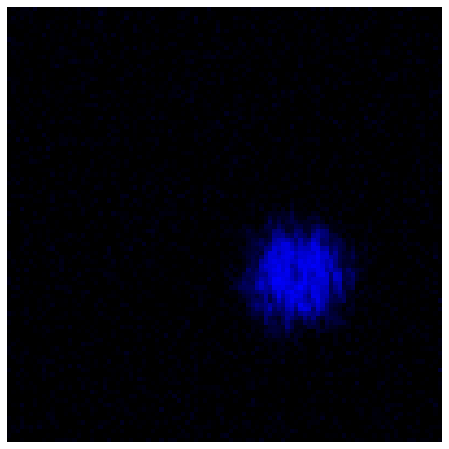

In [12]:
import matplotlib.colors as mcolors

green_cmap = mcolors.LinearSegmentedColormap.from_list(
    'green_cmap',
    [(0, '#000000'), (1, '#00FF00')],
    N=256
)

yellow_cmap = mcolors.LinearSegmentedColormap.from_list(
    'yellow_cmap',
    [(0, '#000000'), (1, '#FFFF00')],
    N=256
)

orange_cmap = mcolors.LinearSegmentedColormap.from_list(
    'orange_cmap',
    [(0, '#000000'), (1, '#FFA500')],
    N=256
)

blue_cmap = mcolors.LinearSegmentedColormap.from_list(
    'blue_cmap',
    [(0, '#000000'), (1, '#0000FF')],
    N=256
)

red_cmap = mcolors.LinearSegmentedColormap.from_list(
    'red_cmap',
    [(0, '#000000'), (1, '#FF0000')],
    N=256
)

plt.figure(figsize=(8, 8))
plt.imshow(new5_noise, cmap=blue_cmap)
plt.axis('off')
plt.show()

In [13]:
def Fourier_Trans(img):    
    f_transform = np.fft.fft2(img)
    f_shifted = np.fft.fftshift(f_transform)
    magnitude_spectrum = np.log(np.abs(f_shifted) + 1)
    return f_shifted, magnitude_spectrum

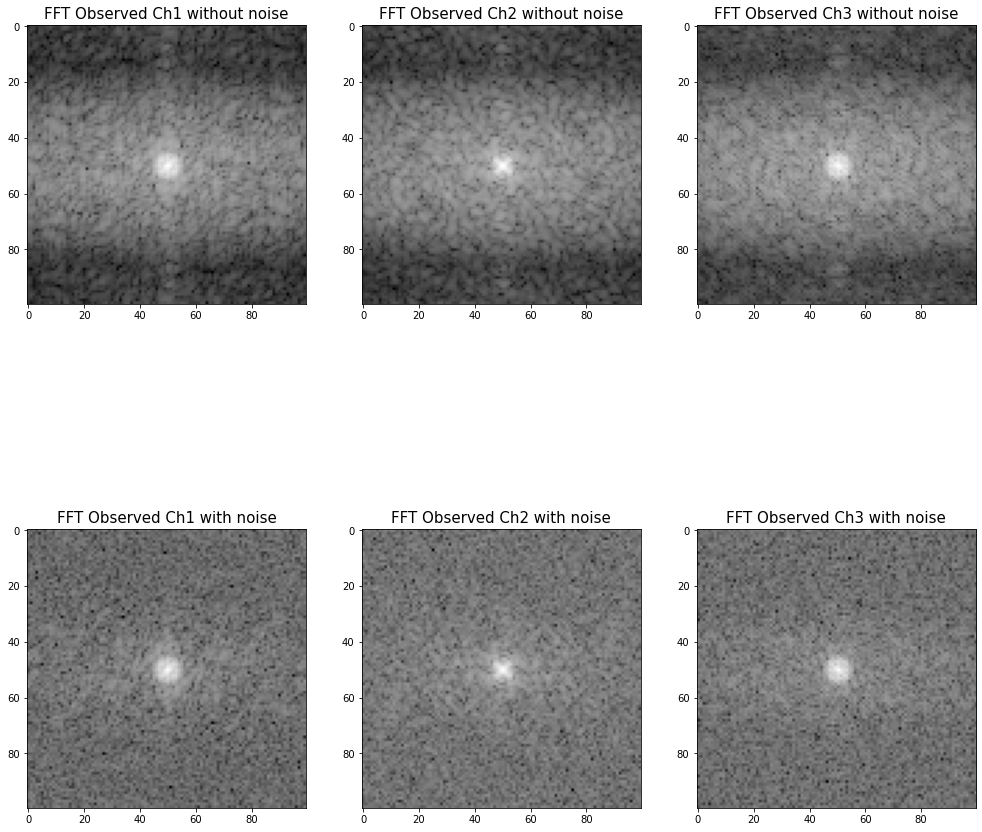

In [14]:
ch1_shifted, f_trans_ch1 = Fourier_Trans(measured_img1)
ch2_shifted, f_trans_ch2 = Fourier_Trans(measured_img2)
ch3_shifted, f_trans_ch3 = Fourier_Trans(measured_img3)
ch4_shifted, f_trans_ch4 = Fourier_Trans(measured_img4)
ch5_shifted, f_trans_ch5 = Fourier_Trans(measured_img5)

noi_ch1_shifted, f_trans_noi_ch1 = Fourier_Trans(img1_noise)
noi_ch2_shifted, f_trans_noi_ch2 = Fourier_Trans(img2_noise)
noi_ch3_shifted, f_trans_noi_ch3 = Fourier_Trans(img3_noise)
noi_ch4_shifted, f_trans_noi_ch4 = Fourier_Trans(img4_noise)
noi_ch5_shifted, f_trans_noi_ch5 = Fourier_Trans(img5_noise)

plt.figure(figsize=(17, 17))
plt.subplot(231)
plt.imshow(f_trans_ch1, cmap='gray')
plt.title('FFT Observed Ch1 without noise', size = 15)
plt.subplot(232)
plt.imshow(f_trans_ch2, cmap='gray')
plt.title('FFT Observed Ch2 without noise', size = 15)
plt.subplot(233)
plt.imshow(f_trans_ch3, cmap='gray')
plt.title('FFT Observed Ch3 without noise', size = 15)
plt.subplot(234)
plt.imshow(f_trans_noi_ch1, cmap='gray')
plt.title('FFT Observed Ch1 with noise', size = 15)
plt.subplot(235)
plt.imshow(f_trans_noi_ch2, cmap='gray')
plt.title('FFT Observed Ch2 with noise', size = 15)
plt.subplot(236)
plt.imshow(f_trans_noi_ch3, cmap='gray')
plt.title('FFT Observed Ch3 with noise', size = 15)
plt.show()

In [15]:
rows, cols = measured_img2.shape
crow, ccol = rows // 2, cols // 2
radius = 6

low_pass = np.zeros((rows, cols), dtype=np.uint8)
Y, X = np.ogrid[:rows, :cols]
dist_from_center = np.sqrt((X - ccol)**2 + (Y - crow)**2)
mask = dist_from_center <= radius
low_pass[mask] = 1

TypeError: Image data of dtype complex128 cannot be converted to float

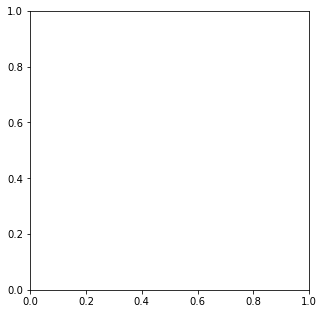

In [16]:
f_trans_ch1_filtered = low_pass * ch1_shifted
f_trans_ch2_filtered = low_pass * ch2_shifted
f_trans_ch3_filtered = low_pass * ch3_shifted
f_trans_ch4_filtered = low_pass * ch4_shifted
f_trans_ch5_filtered = low_pass * ch5_shifted

f_trans_noi_ch1_filtered = low_pass * noi_ch1_shifted
f_trans_noi_ch2_filtered = low_pass * noi_ch2_shifted
f_trans_noi_ch3_filtered = low_pass * noi_ch3_shifted
f_trans_noi_ch4_filtered = low_pass * noi_ch4_shifted
f_trans_noi_ch5_filtered = low_pass * noi_ch5_shifted

# f_trans_ch1_filtered = low_pass * f_trans_ch1
# f_trans_ch2_filtered = low_pass * f_trans_ch2
# f_trans_ch3_filtered = low_pass * f_trans_ch3
# f_trans_noi_ch1_filtered = low_pass * f_trans_noi_ch1
# f_trans_noi_ch2_filtered = low_pass * f_trans_noi_ch2
# f_trans_noi_ch3_filtered = low_pass * f_trans_noi_ch3

plt.figure(figsize=(17, 17))
plt.subplot(231)
plt.imshow(f_trans_ch1_filtered, cmap='gray')
plt.title('FFT Observed Ch1 without noise', size = 15)
plt.subplot(232)
plt.imshow(f_trans_ch2_filtered, cmap='gray')
plt.title('FFT Observed Ch2 without noise', size = 15)
plt.subplot(233)
plt.imshow(f_trans_ch3_filtered, cmap='gray')
plt.title('FFT Observed Ch3 without noise', size = 15)
plt.subplot(234)
plt.imshow(f_trans_noi_ch1_filtered, cmap='gray')
plt.title('FFT Observed Ch1 with noise', size = 15)
plt.subplot(235)
plt.imshow(f_trans_noi_ch2_filtered, cmap='gray')
plt.title('FFT Observed Ch2 with noise', size = 15)
plt.subplot(236)
plt.imshow(f_trans_noi_ch3_filtered, cmap='gray')
plt.title('FFT Observed Ch3 with noise', size = 15)
plt.show()

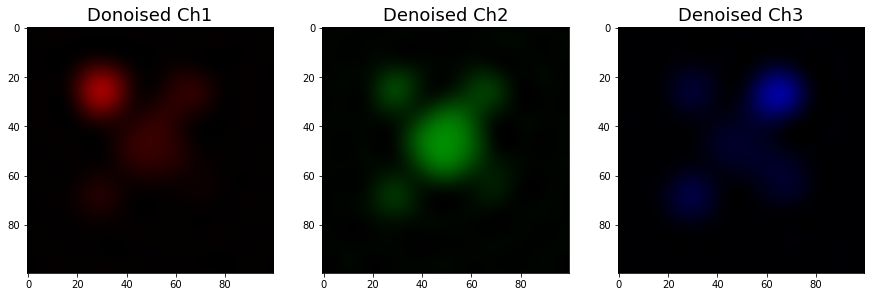

In [24]:
f_ishifted_noi_ch1 = np.fft.ifftshift(f_trans_noi_ch1_filtered)
img_filtered_noi_ch1 = np.fft.ifft2(f_ishifted_noi_ch1)
img_filtered_noi_ch1= np.abs(img_filtered_noi_ch1)

f_ishifted_noi_ch2 = np.fft.ifftshift(f_trans_noi_ch2_filtered)
img_filtered_noi_ch2 = np.fft.ifft2(f_ishifted_noi_ch2)
img_filtered_noi_ch2= np.abs(img_filtered_noi_ch2)

f_ishifted_noi_ch3 = np.fft.ifftshift(f_trans_noi_ch3_filtered)
img_filtered_noi_ch3 = np.fft.ifft2(f_ishifted_noi_ch3)
img_filtered_noi_ch3= np.abs(img_filtered_noi_ch3)

f_ishifted_noi_ch4 = np.fft.ifftshift(f_trans_noi_ch4_filtered)
img_filtered_noi_ch4 = np.fft.ifft2(f_ishifted_noi_ch4)
img_filtered_noi_ch4= np.abs(img_filtered_noi_ch4)

f_ishifted_noi_ch5 = np.fft.ifftshift(f_trans_noi_ch5_filtered)
img_filtered_noi_ch5 = np.fft.ifft2(f_ishifted_noi_ch5)
img_filtered_noi_ch5= np.abs(img_filtered_noi_ch5)

denoised_ch1 = np.zeros((100, 100, 3), dtype=np.uint8)
denoised_ch1[:,:,0] = np.uint8(img_filtered_noi_ch1)

denoised_ch2 = np.zeros((100, 100, 3), dtype=np.uint8)
denoised_ch2[:,:,1] = np.uint8(img_filtered_noi_ch2)

denoised_ch3 = np.zeros((100, 100, 3), dtype=np.uint8)
denoised_ch3[:,:,2] = np.uint8(img_filtered_noi_ch3)

plt.figure(figsize=(15,15))
plt.subplot(231)
plt.imshow(denoised_ch1)
plt.title("Donoised Ch1", size = 18)
plt.subplot(232)
plt.imshow(denoised_ch2)
plt.title("Denoised Ch2", size = 18)
plt.subplot(233)
plt.imshow(denoised_ch3)
plt.title("Denoised Ch3", size = 18)
plt.show()

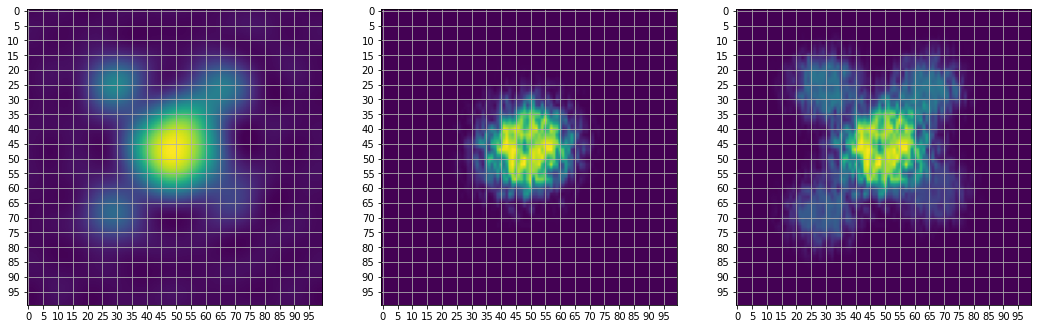

In [25]:
plt.figure(figsize=(18, 18))
plt.subplot(131)
plt.imshow(img_filtered_noi_ch2)
plt.xticks(np.arange(0, 100, 5))
plt.yticks(np.arange(0, 100, 5))
plt.grid('on')
plt.subplot(132)
plt.imshow(new2)
plt.xticks(np.arange(0, 100, 5))
plt.yticks(np.arange(0, 100, 5))
plt.grid('on')
plt.subplot(133)
plt.imshow(measured_img2)
plt.xticks(np.arange(0, 100, 5))
plt.yticks(np.arange(0, 100, 5))
plt.grid('on')
plt.show()

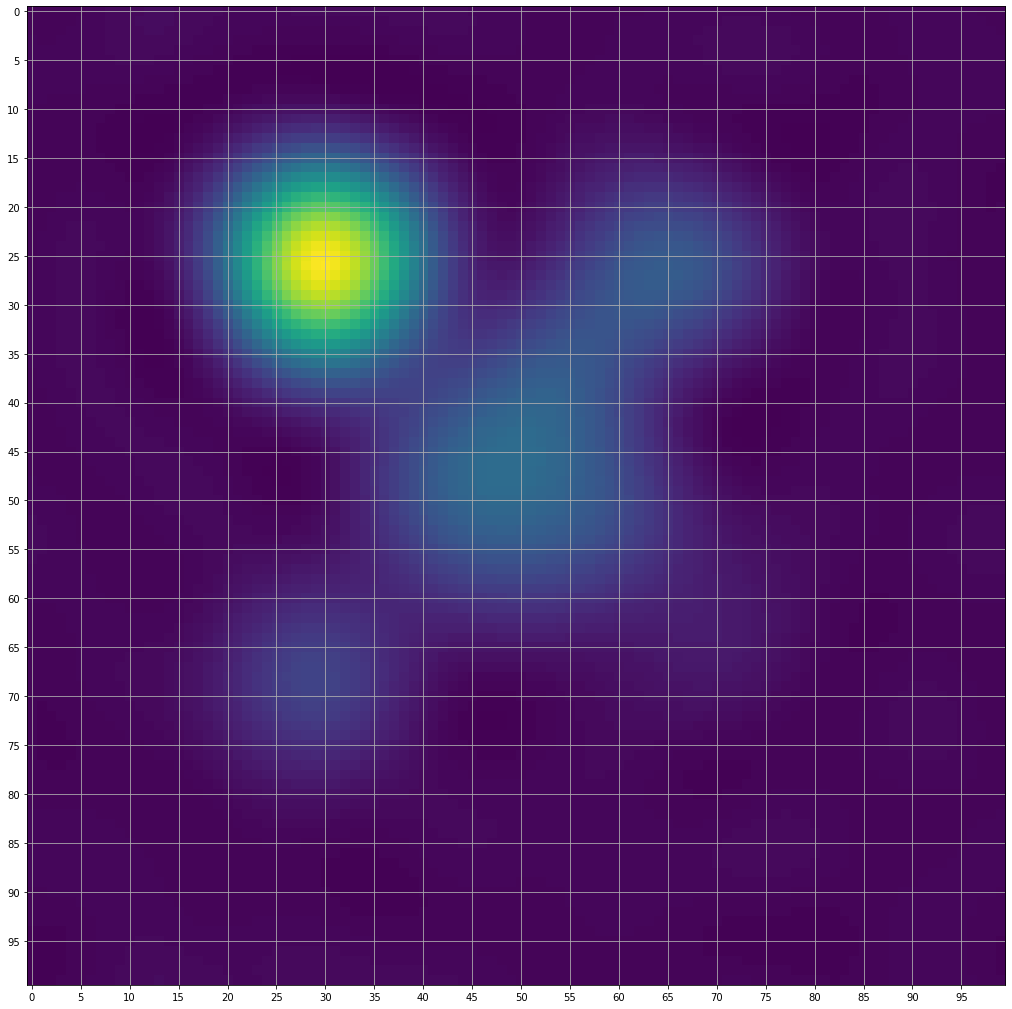

In [26]:
plt.figure(figsize=(18, 18))
plt.imshow(np.uint8(img_filtered_noi_ch1))
plt.xticks(np.arange(0, 100, 5))
plt.yticks(np.arange(0, 100, 5))
plt.grid('on')
plt.show()

# New Method

In [27]:
def create_chopedImg(img, n_ch):
    chopedImg = []
    coordinates = []
    subunit_sz = 5
    stride = [5, 5]
    for i in range(n_ch):
        tensor_im = TF.to_tensor(img[:, :, i].astype(float))
        patches = tensor_im.unfold(1, subunit_sz, stride[0]).unfold(2, subunit_sz, stride[1])
        chopedImg.append(patches.reshape(-1, subunit_sz, subunit_sz).numpy())
        _, h, w, _, _ = patches.shape
        coords = [(x * stride, y * stride) for x in range(h) for y in range(w)]
        coordinates.append(coords)
    return np.array(chopedImg), coordinates[1]

# def find_max(choped_img):
#     mean_Intensity = np.zeros((choped_img.shape[1], choped_img.shape[0]))
#     

In [28]:
merge_img = np.stack((img_filtered_noi_ch1, img_filtered_noi_ch2, img_filtered_noi_ch3, img_filtered_noi_ch4, img_filtered_noi_ch5), axis = -1)
choped_img, _ = create_chopedImg(merge_img, 5)

mean_intensity = np.mean(choped_img, axis = (2, 3))
mean_intensity
# mean_intensity = np.zeros((400, 5))
# for i in range(400):
#     for j in range(5):
#         non_zero_pixel = choped_img[j,i,:,:][choped_img[j,i,:,:] != 0]

array([[2.76181931, 3.86978473, 4.83239543, ..., 2.90880232, 3.69355254,
        2.55449299],
       [3.22785877, 3.72352623, 3.48397565, ..., 4.60254086, 4.0060273 ,
        1.58719971],
       [2.56828736, 2.61544234, 2.89203104, ..., 3.798482  , 4.55770572,
        3.30848111],
       [3.03109005, 2.67484043, 2.29592401, ..., 2.70717953, 3.33911808,
        3.00937755],
       [2.74718947, 3.12888055, 3.0838575 , ..., 2.02823259, 2.93636645,
        2.43382963]])

In [29]:
max_values_indices = np.argmax(mean_intensity, axis=0)  # Indices of max values in each column
print(max_values_indices)

for col, max_index in enumerate(max_values_indices):
    # print(max_index)
    column = mean_intensity[:, col]
    satisfies_condition = True
    for i in range(len(column)):
        if i == max_index:
            continue

        if i < max_index:
            if column[i] > column[i + 1]:
                satisfies_condition = False
                break
        else:
            if column[i] > column[i - 1]:
                satisfies_condition = False
                break
    if satisfies_condition:
        print(f"Column {col} satisfies the condition.")

[1 0 0 0 0 1 1 0 0 1 2 2 1 1 1 1 1 1 0 3 1 0 0 1 1 1 4 4 4 4 4 4 1 1 1 1 1
 2 0 1 1 2 1 1 0 0 0 0 2 1 1 2 2 2 2 1 1 2 2 1 1 1 1 0 0 0 0 0 0 1 2 2 2 2
 2 2 1 1 2 2 1 1 1 0 0 0 0 0 0 0 2 2 2 2 2 2 0 1 1 1 0 1 0 0 0 0 0 0 0 1 2
 2 2 2 2 2 0 0 1 4 0 2 1 0 0 0 0 0 1 1 1 2 2 2 2 2 1 0 0 0 1 2 1 1 0 0 0 1
 1 1 1 1 2 2 2 2 1 1 2 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 3 0 1 2
 1 1 1 1 1 1 1 1 1 4 4 1 2 3 1 1 3 1 1 3 3 1 1 1 1 1 1 4 4 4 4 1 1 3 1 1 1
 1 3 3 3 3 1 1 1 1 1 4 4 4 4 4 1 1 1 2 2 2 3 3 3 3 3 1 1 1 4 4 4 4 4 4 2 1
 1 1 0 3 3 3 3 3 3 3 1 4 4 4 4 4 4 4 3 1 4 1 1 3 3 3 3 3 3 3 2 4 4 4 4 4 4
 1 1 1 4 1 1 1 3 3 3 3 3 3 1 1 1 4 4 4 1 1 1 1 1 1 3 2 3 3 3 3 3 1 1 1 1 1
 2 2 1 1 2 4 1 1 3 3 1 1 1 1 0 0 0 3 0 1 2 2 1 4 2 1 1 1 1 1 3 3 1 1 3 1 1
 1 1 1 1 1 3 1 1 1 1 3 1 1 0 0 0 0 1 1 1 1 2 1 1 1 1 1 1 2 2]
Column 10 satisfies the condition.
Column 16 satisfies the condition.
Column 24 satisfies the condition.
Column 27 satisfies the condition.
Column 34 satisfies the condition.
Column 35 sat

# Channel 1 spillover

In [30]:
max_index = 0

co = np.where(max_values_indices == max_index)[0]
valid_col = []
for col in co:
    column = mean_intensity[:, col]
    satisfies_condition = True
    for i in range(len(column)):
        if i == max_index:
            continue
    
        if i < max_index:
            if column[i] > column[i + 1]:
                satisfies_condition = False
                break
        else:
            if column[i] > column[i - 1]:
                satisfies_condition = False
                break
    if satisfies_condition:
        valid_col.append(col)
        print(f"Column {col} satisfies the condition.")

Column 44 satisfies the condition.
Column 45 satisfies the condition.
Column 46 satisfies the condition.
Column 63 satisfies the condition.
Column 64 satisfies the condition.
Column 65 satisfies the condition.
Column 66 satisfies the condition.
Column 67 satisfies the condition.
Column 68 satisfies the condition.
Column 83 satisfies the condition.
Column 84 satisfies the condition.
Column 85 satisfies the condition.
Column 86 satisfies the condition.
Column 87 satisfies the condition.
Column 88 satisfies the condition.
Column 100 satisfies the condition.
Column 103 satisfies the condition.
Column 104 satisfies the condition.
Column 105 satisfies the condition.
Column 106 satisfies the condition.
Column 107 satisfies the condition.
Column 108 satisfies the condition.
Column 123 satisfies the condition.
Column 124 satisfies the condition.
Column 125 satisfies the condition.
Column 126 satisfies the condition.
Column 127 satisfies the condition.
Column 137 satisfies the condition.
Column 

In [31]:
alpha_21 = [mean_intensity[1,col]/mean_intensity[0, col] for col in valid_col]
# if min(alpha_21) < 0.3:
#     alpha_21 = [(mean_intensity[1,col]+ np.min(mean_intensity))/(mean_intensity[0, col]+ np.min(mean_intensity)) for col in valid_col]

alpha_31 = [mean_intensity[2,col]/mean_intensity[0, col] for col in valid_col]
# if min(alpha_31) < 0.3:
#     alpha_31 = [(mean_intensity[2,col]+ np.min(mean_intensity))/(mean_intensity[0, col]+ np.min(mean_intensity)) for col in valid_col]
    
alpha_41 = [mean_intensity[3,col]/mean_intensity[0, col] for col in valid_col]
# if min(alpha_41) < 0.3:
#     alpha_41 = [(mean_intensity[3,col]+ np.min(mean_intensity))/(mean_intensity[0, col] + np.min(mean_intensity)) for col in valid_col]
    
alpha_51 = [mean_intensity[4,col]/mean_intensity[0, col] for col in valid_col]
# if min(alpha_51) < 0.3:
#     alpha_51 = [(mean_intensity[4,col] + np.min(mean_intensity))/(mean_intensity[0, col] + np.min(mean_intensity)) for col in valid_col]
print(np.percentile(np.array(alpha_21), 10), np.percentile(np.array(alpha_31), 10), np.percentile(np.array(alpha_41), 10), np.percentile(np.array(alpha_51), 10))

0.39203419036555504 0.2943985700530451 0.18905204763279979 0.09396895409777331


# Channel 2 Spillover

In [22]:
max_index = 1

co = np.where(max_values_indices == max_index)[0]
valid_col = []
for col in co:
    column = mean_intensity[:, col]
    satisfies_condition = True
    for i in range(len(column)):
        if i == max_index:
            continue
    
        if i < max_index:
            if column[i] > column[i + 1]:
                satisfies_condition = False
                break
        else:
            if column[i] > column[i - 1]:
                satisfies_condition = False
                break
    if satisfies_condition:
        valid_col.append(col)
        print(f"Column {col} satisfies the condition.")

NameError: name 'max_values_indices' is not defined

In [23]:
alpha_12 = [mean_intensity[0,col]/mean_intensity[1, col] for col in valid_col]
# if min(alpha_12) < 0.3:
#     alpha_12 = [(mean_intensity[0,col]+ np.min(mean_intensity))/(mean_intensity[1, col]+ np.min(mean_intensity)) for col in valid_col]

alpha_32 = [mean_intensity[2,col]/mean_intensity[1, col] for col in valid_col]
# print(np.where(alpha_32 == min(alpha_32)))
# if min(alpha_32) < 0.3:
#     alpha_32 = [(mean_intensity[2,col]+ np.min(mean_intensity))/(mean_intensity[1, col]+ np.min(mean_intensity)) for col in valid_col]

alpha_42 = [mean_intensity[3,col]/mean_intensity[1, col] for col in valid_col]
# if min(alpha_42) < 0.3:
#     alpha_42 = [(mean_intensity[3,col]+ np.min(mean_intensity))/(mean_intensity[1, col] + np.min(mean_intensity)) for col in valid_col]
    
alpha_52 = [mean_intensity[4,col]/mean_intensity[1, col] for col in valid_col]
# if min(alpha_52) < 0.3:
#     alpha_52 = [(mean_intensity[4,col] + + np.min(mean_intensity))/(mean_intensity[1, col] + np.min(mean_intensity)) for col in valid_col]
print(np.percentile(np.array(alpha_12), 10), np.percentile(np.array(alpha_32), 10), np.percentile(np.array(alpha_42), 10), np.percentile(np.array(alpha_52), 10))

NameError: name 'valid_col' is not defined

# Channel 3 Spillover

In [ ]:
max_index = 2

co = np.where(max_values_indices == max_index)[0]
valid_col = []
for col in co:
    column = mean_intensity[:, col]
    satisfies_condition = True
    for i in range(len(column)):
        if i == max_index:
            continue
    
        if i < max_index:
            if column[i] > column[i + 1]:
                satisfies_condition = False
                break
        else:
            if column[i] > column[i - 1]:
                satisfies_condition = False
                break
    if satisfies_condition:
        valid_col.append(col)
        print(f"Column {col} satisfies the condition.")

In [ ]:
alpha_13 = [mean_intensity[0,col]/mean_intensity[2, col] for col in valid_col]
# if min(alpha_13) < 0.3:
#     alpha_13 = [(mean_intensity[0,col]+ np.min(mean_intensity))/(mean_intensity[2, col]+ np.min(mean_intensity)) for col in valid_col]

alpha_23 = [mean_intensity[1,col]/mean_intensity[2, col] for col in valid_col]
# if min(alpha_23) < 0.3:
#     alpha_23 = [(mean_intensity[1,col]+ np.min(mean_intensity))/(mean_intensity[2, col]+ np.min(mean_intensity)) for col in valid_col]
    
alpha_43 = [mean_intensity[3,col]/mean_intensity[2, col] for col in valid_col]
# if min(alpha_43) < 0.3:
#     alpha_43 = [(mean_intensity[3,col]+ np.min(mean_intensity))/(mean_intensity[2, col] + np.min(mean_intensity)) for col in valid_col]
    
alpha_53 = [mean_intensity[4,col]/mean_intensity[2, col] for col in valid_col]
# if min(alpha_53) < 0.3:
#     alpha_53 = [(mean_intensity[4,col] + + np.min(mean_intensity))/(mean_intensity[2, col] + np.min(mean_intensity)) for col in valid_col]
print(np.percentile(np.array(alpha_13), 10), np.percentile(np.array(alpha_23), 10), np.percentile(np.array(alpha_43), 10), np.percentile(np.array(alpha_53), 10))

# Channel 4 Spillover

In [ ]:
max_index = 3

co = np.where(max_values_indices == max_index)[0]
valid_col = []
for col in co:
    column = mean_intensity[:, col]
    satisfies_condition = True
    for i in range(len(column)):
        if i == max_index:
            continue
    
        if i < max_index:
            if column[i] > column[i + 1]:
                satisfies_condition = False
                break
        else:
            if column[i] > column[i - 1]:
                satisfies_condition = False
                break
    if satisfies_condition:
        valid_col.append(col)
        print(f"Column {col} satisfies the condition.")

In [ ]:
alpha_14 = [mean_intensity[0,col]/mean_intensity[3, col] for col in valid_col]
# if min(alpha_14) < 0.3:
#     alpha_14 = [(mean_intensity[0,col]+ np.min(mean_intensity))/(mean_intensity[3, col]+ np.min(mean_intensity)) for col in valid_col]

alpha_24 = [mean_intensity[1,col]/mean_intensity[3, col] for col in valid_col]
# if min(alpha_24) < 0.3:
#     alpha_24 = [(mean_intensity[1,col]+ np.min(mean_intensity))/(mean_intensity[3, col]+ np.min(mean_intensity)) for col in valid_col]
    
alpha_34 = [mean_intensity[2,col]/mean_intensity[3, col] for col in valid_col]
# if min(alpha_34) < 0.3:
#     alpha_34 = [(mean_intensity[2,col]+ np.min(mean_intensity))/(mean_intensity[3, col] + np.min(mean_intensity)) for col in valid_col]
    
alpha_54 = [mean_intensity[4,col]/mean_intensity[3, col] for col in valid_col]
# if min(alpha_54) < 0.3:
#     alpha_54 = [(mean_intensity[4,col] + + np.min(mean_intensity))/(mean_intensity[3, col] + np.min(mean_intensity)) for col in valid_col]
print(min(alpha_14), min(alpha_24), min(alpha_34), min(alpha_54))

# Channel 5 Spillover

In [ ]:
max_index = 4

co = np.where(max_values_indices == max_index)[0]
valid_col = []
for col in co:
    column = mean_intensity[:, col]
    satisfies_condition = True
    for i in range(len(column)):
        if i == max_index:
            continue
    
        if i < max_index:
            if column[i] > column[i + 1]:
                satisfies_condition = False
                break
        else:
            if column[i] > column[i - 1]:
                satisfies_condition = False
                break
    if satisfies_condition:
        valid_col.append(col)
        print(f"Column {col} satisfies the condition.")

In [ ]:
alpha_15 = [mean_intensity[0,col]/mean_intensity[4, col] for col in valid_col]
# if min(alpha_15) < 0.3:
#     alpha_15 = [(mean_intensity[0,col]+ np.min(mean_intensity))/(mean_intensity[4, col]+ np.min(mean_intensity)) for col in valid_col]

alpha_25 = [mean_intensity[1,col]/mean_intensity[4, col] for col in valid_col]
# if min(alpha_25) < 0.3:
#     alpha_25 = [(mean_intensity[1,col]+ np.min(mean_intensity))/(mean_intensity[4, col]+ np.min(mean_intensity)) for col in valid_col]
    
alpha_35 = [mean_intensity[2,col]/mean_intensity[4, col] for col in valid_col]
# if min(alpha_35) < 0.3:
#     alpha_35 = [(mean_intensity[2,col]+ np.min(mean_intensity))/(mean_intensity[4, col] + np.min(mean_intensity)) for col in valid_col]
    
alpha_45 = [mean_intensity[3,col]/mean_intensity[4, col] for col in valid_col]
# if min(alpha_45) < 0.3:
#     alpha_45 = [(mean_intensity[3,col] + + np.min(mean_intensity))/(mean_intensity[4, col] + np.min(mean_intensity)) for col in valid_col]
print(min(alpha_15), min(alpha_25), min(alpha_35), min(alpha_45))

In [32]:
list_dict = {i: [] for i in range(10)}

In [33]:
alpha21 = []
alpha31 = []
alpha41 = []
alpha51 = []

alpha12 = []
alpha32 = []
alpha42 = []
alpha52 = []

alpha13 = []
alpha23 = []
alpha43 = []
alpha53 = []

alpha14 = []
alpha24 = []
alpha34 = []
alpha54 = []

alpha15 = []
alpha25 = []
alpha35 = []
alpha45 = []

for _ in range(300):
    new1 = np.zeros((100, 100))
    new2 = np.zeros((100, 100))
    new3 = np.zeros((100, 100))
    new4 = np.zeros((100, 100))
    new5 = np.zeros((100, 100))
    
    pos1_1 = random.randint(0, 15)
    pos1_2 = random.randint(0, 15)
    new1[pos1_1:40 + pos1_1, pos1_2:40 + pos1_2] = img1[23:63, 30:70]
    # pos2_1 = random.randint(0, 45)
    pos2_1 = random.randint(0, 35)
    # new2[10 + pos2_1:65 + pos2_1, 20:75] = img2[45:100, 25:80]
    new2[pos2_1:55 + pos2_1, 20:75] = img2[45:100, 25:80]
    pos3_1 = random.randint(0, 15)
    pos3_2 = random.randint(0, 15)
    new3[pos3_1:40 + pos3_1, 40 + pos3_2:80 + pos3_2] = img3[23:63, 35:75]
    pos4_1 = random.randint(0, 20)
    pos4_2 = random.randint(0, 25)
    new4[40 + pos4_1:80 + pos4_1, pos4_2:40 + pos4_2] = img4[33:73, 60:100]
    pos5_1 = random.randint(0, 20)
    pos5_2 = random.randint(0, 20)
    new5[40 + pos5_1:80 + pos5_1, 40 + pos5_2:80 + pos5_2] = img5[55:95, 53:93]
    
    measured_img1 = new1 + 0.4 * new2 + 0.3 * new3 + 0.2 * new4 + 0.1 * new5
    measured_img2 = 0.4 * new1 + new2 + 0.4 * new3 + 0.3 * new4 + 0.2 * new5
    measured_img3 = 0.3 * new1 + 0.3 * new2 + new3 + 0.4 * new4 + 0.3 * new5
    measured_img4 = 0.2 * new1 + 0.2 * new2 + 0.3 * new3 + new4 + 0.4 * new5
    measured_img5 = 0.1 * new1 + 0.1 * new2 + 0.2 * new3 + 0.4 * new4 + new5
    
    img1_noise = add_noise_based_on_snr(measured_img1, 10, 32).astype(np.single) #seed = 12
    img1_noise[img1_noise > 255.0] = 255.0
    img2_noise = add_noise_based_on_snr(measured_img2, 10, 23).astype(np.single) #seed = 20
    img2_noise[img2_noise > 255.0] = 255.0
    img3_noise = add_noise_based_on_snr(measured_img3, 10, 33).astype(np.single)
    img3_noise[img3_noise > 255.0] = 255.0
    img4_noise = add_noise_based_on_snr(measured_img4, 10, 2).astype(np.single) #seed = 20
    img4_noise[img4_noise > 255.0] = 255.0
    img5_noise = add_noise_based_on_snr(measured_img5, 10, 3).astype(np.single)
    img5_noise[img5_noise > 255.0] = 255.0
    
    noi_ch1_shifted, f_trans_noi_ch1 = Fourier_Trans(img1_noise)
    noi_ch2_shifted, f_trans_noi_ch2 = Fourier_Trans(img2_noise)
    noi_ch3_shifted, f_trans_noi_ch3 = Fourier_Trans(img3_noise)
    noi_ch4_shifted, f_trans_noi_ch4 = Fourier_Trans(img4_noise)
    noi_ch5_shifted, f_trans_noi_ch5 = Fourier_Trans(img5_noise)
    
    f_trans_noi_ch1_filtered = low_pass * noi_ch1_shifted
    f_trans_noi_ch2_filtered = low_pass * noi_ch2_shifted
    f_trans_noi_ch3_filtered = low_pass * noi_ch3_shifted
    f_trans_noi_ch4_filtered = low_pass * noi_ch4_shifted
    f_trans_noi_ch5_filtered = low_pass * noi_ch5_shifted
    
    f_ishifted_noi_ch1 = np.fft.ifftshift(f_trans_noi_ch1_filtered)
    img_filtered_noi_ch1 = np.fft.ifft2(f_ishifted_noi_ch1)
    img_filtered_noi_ch1= np.abs(img_filtered_noi_ch1)
    
    f_ishifted_noi_ch2 = np.fft.ifftshift(f_trans_noi_ch2_filtered)
    img_filtered_noi_ch2 = np.fft.ifft2(f_ishifted_noi_ch2)
    img_filtered_noi_ch2= np.abs(img_filtered_noi_ch2)
    
    f_ishifted_noi_ch3 = np.fft.ifftshift(f_trans_noi_ch3_filtered)
    img_filtered_noi_ch3 = np.fft.ifft2(f_ishifted_noi_ch3)
    img_filtered_noi_ch3= np.abs(img_filtered_noi_ch3)
    
    f_ishifted_noi_ch4 = np.fft.ifftshift(f_trans_noi_ch4_filtered)
    img_filtered_noi_ch4 = np.fft.ifft2(f_ishifted_noi_ch4)
    img_filtered_noi_ch4= np.abs(img_filtered_noi_ch4)
    
    f_ishifted_noi_ch5 = np.fft.ifftshift(f_trans_noi_ch5_filtered)
    img_filtered_noi_ch5 = np.fft.ifft2(f_ishifted_noi_ch5)
    img_filtered_noi_ch5= np.abs(img_filtered_noi_ch5)
    
    merge_img = np.stack((img_filtered_noi_ch1, img_filtered_noi_ch2, img_filtered_noi_ch3, img_filtered_noi_ch4, img_filtered_noi_ch5), axis = -1)
    choped_img, _ = create_chopedImg(merge_img, 5)
    mean_intensity = np.mean(choped_img, axis = (2, 3))
    
    max_values_indices = np.argmax(mean_intensity, axis=0)  # Indices of max values in each column


    for col, max_index in enumerate(max_values_indices):
        # print(max_index)
        column = mean_intensity[:, col]
        satisfies_condition = True
        for i in range(len(column)):
            if i == max_index:
                continue
    
            if i < max_index:
                if column[i] > column[i + 1]:
                    satisfies_condition = False
                    break
            else:
                if column[i] > column[i - 1]:
                    satisfies_condition = False
                    break
        # if satisfies_condition:
        #     print(f"Column {col} satisfies the condition.")
    
    co_0 = np.where(max_values_indices == 0)[0]
    valid_col_0 = []
    for col in co_0:
        column = mean_intensity[:, col]
        satisfies_condition = True
        for i in range(len(column)):
            if i == 0:
                continue
        
            if i < 0:
                if column[i] > column[i + 1]:
                    satisfies_condition = False
                    break
            else:
                if column[i] > column[i - 1]:
                    satisfies_condition = False
                    break
        if satisfies_condition:
            valid_col_0.append(col)
            # print(f"Column {col} satisfies the condition.")
    alpha_21 = [mean_intensity[1,col]/mean_intensity[0, col] for col in valid_col_0]
    # alpha21.append(min(alpha_21))
    alpha21.append(np.percentile(np.array(alpha_21), 10))
    alpha_31 = [mean_intensity[2,col]/mean_intensity[0, col] for col in valid_col_0]
    # alpha31.append(min(alpha_31))
    alpha31.append(np.percentile(np.array(alpha_31), 10))
    alpha_41 = [mean_intensity[3,col]/mean_intensity[0, col] for col in valid_col_0]
    # alpha41.append(min(alpha_41))
    alpha41.append(np.percentile(np.array(alpha_41), 10))
    alpha_51 = [mean_intensity[4,col]/mean_intensity[0, col] for col in valid_col_0]
    # alpha51.append(min(alpha_51))
    alpha51.append(np.percentile(np.array(alpha_51), 10))
    
    co_1 = np.where(max_values_indices == 1)[0]
    valid_col_1 = []
    for col in co_1:
        column = mean_intensity[:, col]
        satisfies_condition = True
        for i in range(len(column)):
            if i == 1:
                continue
        
            if i < 1:
                if column[i] > column[i + 1]:
                    satisfies_condition = False
                    break
            else:
                if column[i] > column[i - 1]:
                    satisfies_condition = False
                    break
        if satisfies_condition:
            valid_col_1.append(col)
            # print(f"Column {col} satisfies the condition.")
    alpha_12 = [mean_intensity[0,col]/mean_intensity[1, col] for col in valid_col_1]
    alpha12.append(np.percentile(np.array(alpha_12), 10))
    alpha_32 = [mean_intensity[2,col]/mean_intensity[1, col] for col in valid_col_1]
    # alpha32.append(min(alpha_32))
    alpha32.append(np.percentile(np.array(alpha_32), 10))
    alpha_42 = [mean_intensity[3,col]/mean_intensity[1, col] for col in valid_col_1]
    # alpha42.append(min(alpha_42))
    alpha42.append(np.percentile(np.array(alpha_42), 10))
    alpha_52 = [mean_intensity[4,col]/mean_intensity[1, col] for col in valid_col_1]
    alpha52.append(min(alpha_52))
    # alpha52.append(np.percentile(np.array(alpha_52), 10))

    co_2 = np.where(max_values_indices == 2)[0]
    valid_col_2 = []
    for col in co_2:
        column = mean_intensity[:, col]
        satisfies_condition = True
        for i in range(len(column)):
            if i == 2:
                continue
        
            if i < 2:
                if column[i] > column[i + 1]:
                    satisfies_condition = False
                    break
            else:
                if column[i] > column[i - 1]:
                    satisfies_condition = False
                    break
        if satisfies_condition:
            valid_col_2.append(col)
            # print(f"Column {col} satisfies the condition.")
    alpha_13 = [mean_intensity[0,col]/mean_intensity[2, col] for col in valid_col_2]
    # alpha13.append(min(alpha_13))
    alpha13.append(np.percentile(np.array(alpha_13), 10))
    alpha_23 = [mean_intensity[1,col]/mean_intensity[2, col] for col in valid_col_2]
    # alpha23.append(min(alpha_23))
    alpha23.append(np.percentile(np.array(alpha_23), 10))
    alpha_43 = [mean_intensity[3,col]/mean_intensity[2, col] for col in valid_col_2]
    # alpha43.append(min(alpha_43))
    alpha43.append(np.percentile(np.array(alpha_43), 10))
    alpha_53 = [mean_intensity[4,col]/mean_intensity[2, col] for col in valid_col_2]
    # alpha53.append(min(alpha_53))
    alpha53.append(np.percentile(np.array(alpha_53), 10))
    
    co_3 = np.where(max_values_indices == 3)[0]
    valid_col_3 = []
    for col in co_3:
        column = mean_intensity[:, col]
        satisfies_condition = True
        for i in range(len(column)):
            if i == 3:
                continue
        
            if i < 3:
                if column[i] > column[i + 1]:
                    satisfies_condition = False
                    break
            else:
                if column[i] > column[i - 1]:
                    satisfies_condition = False
                    break
        if satisfies_condition:
            valid_col_3.append(col)
            # print(f"Column {col} satisfies the condition.")
    alpha_14 = [mean_intensity[0,col]/mean_intensity[3, col] for col in valid_col_3]
    # alpha14.append(min(alpha_14))
    alpha14.append(np.percentile(np.array(alpha_14), 10))
    alpha_24 = [mean_intensity[1,col]/mean_intensity[3, col] for col in valid_col_3]
    # alpha24.append(min(alpha_24))
    alpha24.append(np.percentile(np.array(alpha_24), 10))
    alpha_34 = [mean_intensity[2,col]/mean_intensity[3, col] for col in valid_col_3]
    # alpha34.append(min(alpha_34))
    alpha34.append(np.percentile(np.array(alpha_34), 10))
    alpha_54 = [mean_intensity[4,col]/mean_intensity[3, col] for col in valid_col_3]
    # alpha54.append(min(alpha_54))
    alpha54.append(np.percentile(np.array(alpha_54), 10))

    co_4 = np.where(max_values_indices == 4)[0]
    valid_col_4 = []
    for col in co_4:
        column = mean_intensity[:, col]
        satisfies_condition = True
        for i in range(len(column)):
            if i == 4:
                continue
        
            if i < 4:
                if column[i] > column[i + 1]:
                    satisfies_condition = False
                    break
            else:
                if column[i] > column[i - 1]:
                    satisfies_condition = False
                    break
        if satisfies_condition:
            valid_col_4.append(col)
            # print(f"Column {col} satisfies the condition.")
    alpha_15 = [mean_intensity[0,col]/mean_intensity[4, col] for col in valid_col_4]
    # print(alpha_15)
    # alpha15.append(min(alpha_15))
    alpha15.append(np.percentile(np.array(alpha_15), 10))
    alpha_25 = [mean_intensity[1,col]/mean_intensity[4, col] for col in valid_col_4]
    # alpha25.append(min(alpha_25))
    alpha25.append(np.percentile(np.array(alpha_25), 10))
    alpha_35 = [mean_intensity[2,col]/mean_intensity[4, col] for col in valid_col_4]
    # alpha35.append(min(alpha_35))
    alpha35.append(np.percentile(np.array(alpha_35), 10))
    alpha_45 = [mean_intensity[3,col]/mean_intensity[4, col] for col in valid_col_4]
    # alpha45.append(min(alpha_45))
    alpha45.append(np.percentile(np.array(alpha_45), 10))

In [34]:
a21 = [(i - 0.4) / 0.4 for i in alpha21]
a31 = [(i - 0.3) / 0.3 for i in alpha31]
a41 = [(i - 0.2) / 0.2 for i in alpha41]
a51 = [(i - 0.1) / 0.1 for i in alpha51]
print(np.mean(alpha21), np.mean(alpha31), np.mean(alpha41), np.mean(alpha51))
print(np.std(alpha21), np.std(alpha31), np.std(alpha41), np.std(alpha51))

0.39419117947873145 0.29476399048509355 0.19035886077790154 0.09267515312636727
0.013111022439204272 0.005997052536369088 0.003450415165798033 0.0025576093680064224


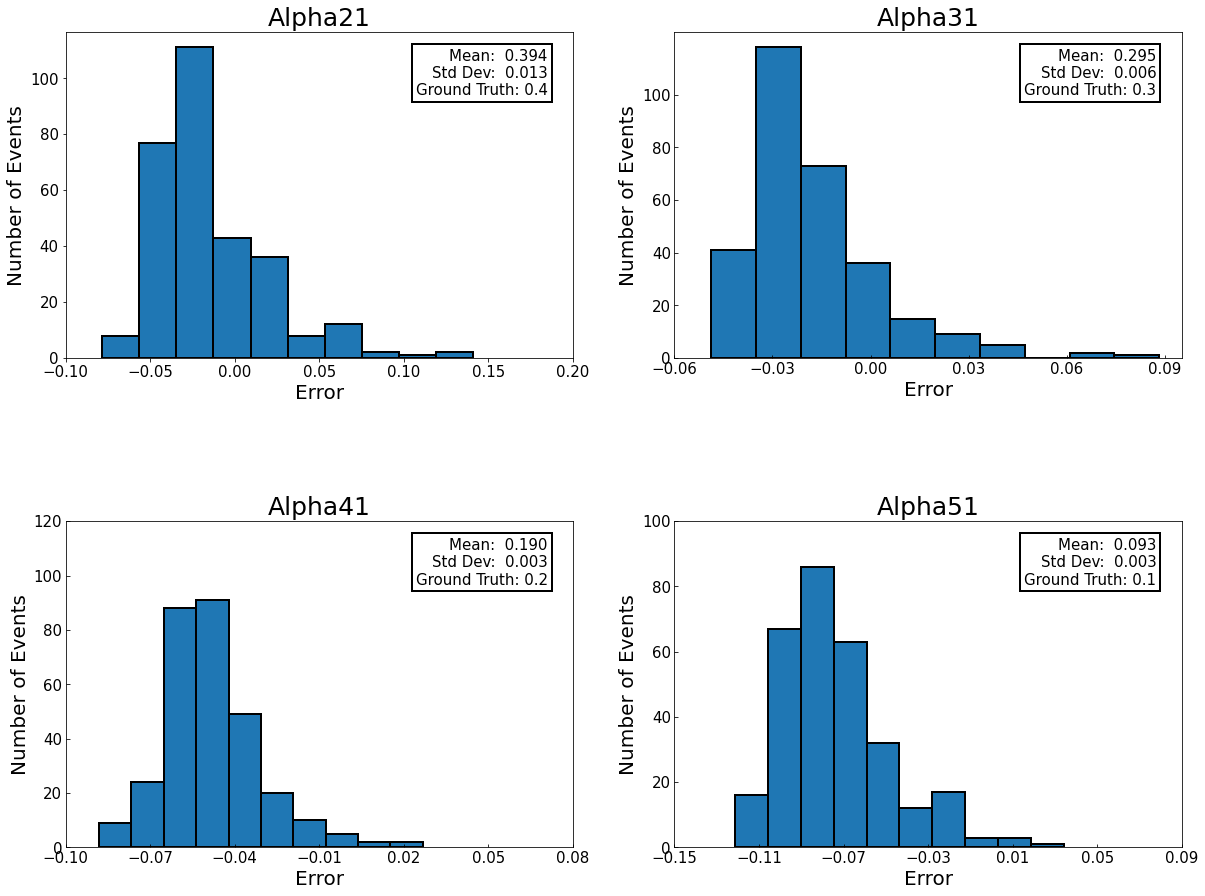

In [35]:
plt.figure(figsize=(20, 15))
plt.subplot(221)
plt.hist(a21, bins=10, range=(min(a21), max(a21)), edgecolor = 'black', linewidth = 2)
plt.title('Alpha21', size = 25)
plt.xlabel('Error', size = 20)
plt.ylabel('Number of Events', size = 20)
plt.yticks(np.arange(0, 120, 20), size = 15)
plt.xticks(np.arange(-0.1, 0.2, 0.05), size = 15)
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.text(0.95, 0.95, f'Mean: {np.mean(alpha21): .3f}\nStd Dev: {np.std(alpha21): .3f}\nGround Truth: {0.4}', 
         transform=plt.gca().transAxes, 
         fontsize=15, 
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', edgecolor = 'black', alpha = 1.0, linewidth = 2))

plt.subplot(222)
plt.hist(a31, bins=10, range=(min(a31), max(a31)), edgecolor = 'black', linewidth = 2)
plt.title('Alpha31', size = 25)
plt.xlabel('Error', size = 20)
plt.ylabel('Number of Events', size = 20)
plt.yticks(np.arange(0, 120, 20), size = 15)
plt.xticks(np.arange(-0.06, 0.12, 0.03), size = 15)
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.text(0.95, 0.95, f'Mean: {np.mean(alpha31): .3f}\nStd Dev: {np.std(alpha31): .3f}\nGround Truth: {0.3}', 
         transform=plt.gca().transAxes, 
         fontsize=15, 
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', edgecolor = 'black', alpha = 1.0, linewidth = 2))

plt.subplot(223)
plt.hist(a41, bins=10, range=(min(a41), max(a41)), edgecolor = 'black', linewidth = 2)
plt.title('Alpha41', size = 25)
plt.xlabel('Error', size = 20)
plt.ylabel('Number of Events', size = 20)
plt.yticks(np.arange(0, 140, 20), size = 15)
plt.xticks(np.arange(-0.1, 0.1, 0.03), size = 15)
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.text(0.95, 0.95, f'Mean: {np.mean(alpha41): .3f}\nStd Dev: {np.std(alpha41): .3f}\nGround Truth: {0.2}', 
         transform=plt.gca().transAxes, 
         fontsize=15, 
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', edgecolor = 'black', alpha = 1.0, linewidth = 2))

plt.subplot(224)
plt.hist(a51, bins=10, range=(min(a51), max(a51)), edgecolor = 'black', linewidth = 2)
plt.title('Alpha51', size = 25)
plt.xlabel('Error', size = 20)
plt.ylabel('Number of Events', size = 20)
plt.yticks(np.arange(0, 120, 20), size = 15)
plt.xticks(np.arange(-0.15, 0.1, 0.04), size = 15)
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.text(0.95, 0.95, f'Mean: {np.mean(alpha51): .3f}\nStd Dev: {np.std(alpha51): .3f}\nGround Truth: {0.1}', 
         transform=plt.gca().transAxes, 
         fontsize=15, 
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', edgecolor = 'black', alpha = 1.0, linewidth = 2))

plt.subplots_adjust(hspace=0.5)
plt.show()

In [36]:
a12 = [(i - 0.4) / 0.4 for i in alpha12]
a32 = [(i - 0.3) / 0.3 for i in alpha32]
a42 = [(i - 0.2) / 0.2 for i in alpha42]
a52 = [(i - 0.1) / 0.1 for i in alpha52]
print(np.mean(alpha12), np.mean(alpha32), np.mean(alpha42), np.mean(alpha52))
print(np.std(alpha12), np.std(alpha32), np.std(alpha42), np.std(alpha52))

0.39086812537670584 0.30479407387454194 0.1952256682613446 0.07467789103165008
0.009106100235370613 0.016110653969465673 0.01681394481508637 0.014228215697824079


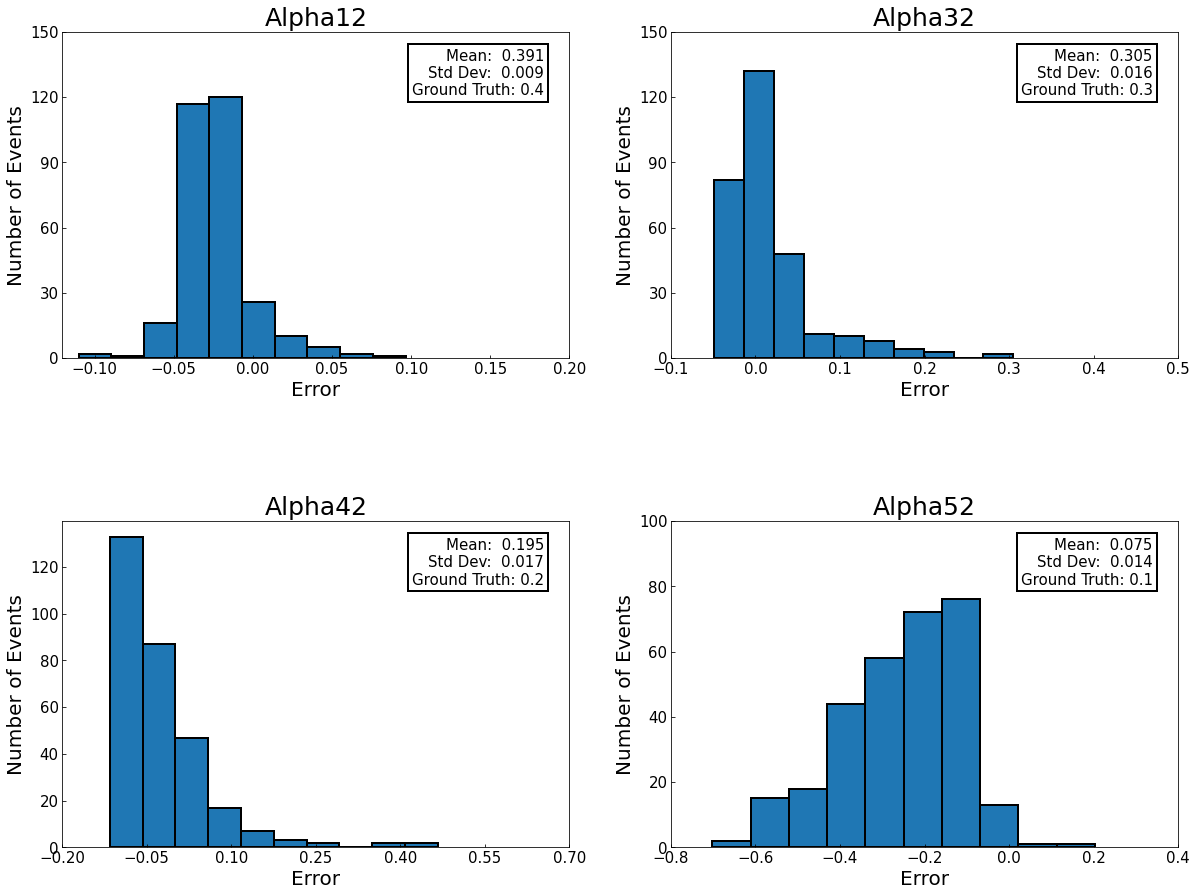

In [37]:
plt.figure(figsize=(20, 15))
plt.subplot(221)
plt.hist(a12, bins=10, range=(min(a12), max(a12)), edgecolor = 'black', linewidth = 2)
plt.title('Alpha12', size = 25)
plt.xlabel('Error', size = 20)
plt.ylabel('Number of Events', size = 20)
plt.yticks(np.arange(0, 160, 30), size = 15)
plt.xticks(np.arange(-0.1, 0.2, 0.05), size = 15)
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.text(0.95, 0.95, f'Mean: {np.mean(alpha12): .3f}\nStd Dev: {np.std(alpha12): .3f}\nGround Truth: {0.4}', 
         transform=plt.gca().transAxes, 
         fontsize=15, 
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', edgecolor = 'black', alpha = 1.0, linewidth = 2))

plt.subplot(222)
plt.hist(a32, bins=10, range=(min(a32), max(a32)), edgecolor = 'black', linewidth = 2)
plt.title('Alpha32', size = 25)
plt.xlabel('Error', size = 20)
plt.ylabel('Number of Events', size = 20)
plt.yticks(np.arange(0, 175, 30), size = 15)
plt.xticks(np.arange(-0.1, 0.6, 0.1), size = 15)
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.text(0.95, 0.95, f'Mean: {np.mean(alpha32): .3f}\nStd Dev: {np.std(alpha32): .3f}\nGround Truth: {0.3}', 
         transform=plt.gca().transAxes, 
         fontsize=15, 
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', edgecolor = 'black', alpha = 1.0, linewidth = 2))

plt.subplot(223)
plt.hist(a42, bins=10, range=(min(a42), max(a42)), edgecolor = 'black', linewidth = 2)
plt.title('Alpha42', size = 25)
plt.xlabel('Error', size = 20)
plt.ylabel('Number of Events', size = 20)
plt.yticks(np.arange(0, 130, 20), size = 15)
plt.xticks(np.arange(-0.2, 0.8, 0.15), size = 15)
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.text(0.95, 0.95, f'Mean: {np.mean(alpha42): .3f}\nStd Dev: {np.std(alpha42): .3f}\nGround Truth: {0.2}', 
         transform=plt.gca().transAxes, 
         fontsize=15, 
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', edgecolor = 'black', alpha = 1.0, linewidth = 2))

plt.subplot(224)
plt.hist(a52, bins=10, range=(min(a52), max(a52)), edgecolor = 'black', linewidth = 2)
plt.title('Alpha52', size = 25)
plt.xlabel('Error', size = 20)
plt.ylabel('Number of Events', size = 20)
plt.yticks(np.arange(0, 120, 20), size = 15)
plt.xticks(np.arange(-0.8, 0.4, 0.2), size = 15)
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.text(0.95, 0.95, f'Mean: {np.mean(alpha52): .3f}\nStd Dev: {np.std(alpha52): .3f}\nGround Truth: {0.1}', 
         transform=plt.gca().transAxes, 
         fontsize=15, 
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', edgecolor = 'black', alpha = 1.0, linewidth = 2))

plt.subplots_adjust(hspace=0.5)
plt.show()

In [38]:
a13 = [(i - 0.3) / 0.3 for i in alpha13]
a23 = [(i - 0.4) / 0.4 for i in alpha23]
a43 = [(i - 0.3) / 0.3 for i in alpha43]
a53 = [(i - 0.2) / 0.2 for i in alpha53]
print(np.mean(alpha13), np.mean(alpha23), np.mean(alpha43), np.mean(alpha53))
print(np.std(alpha13), np.std(alpha23), np.std(alpha43), np.std(alpha53))

0.29615102077959904 0.3912815946278481 0.29598140963317626 0.1908052529265141
0.007981427309980383 0.012530022193992305 0.0063724945747437615 0.005303778995663312


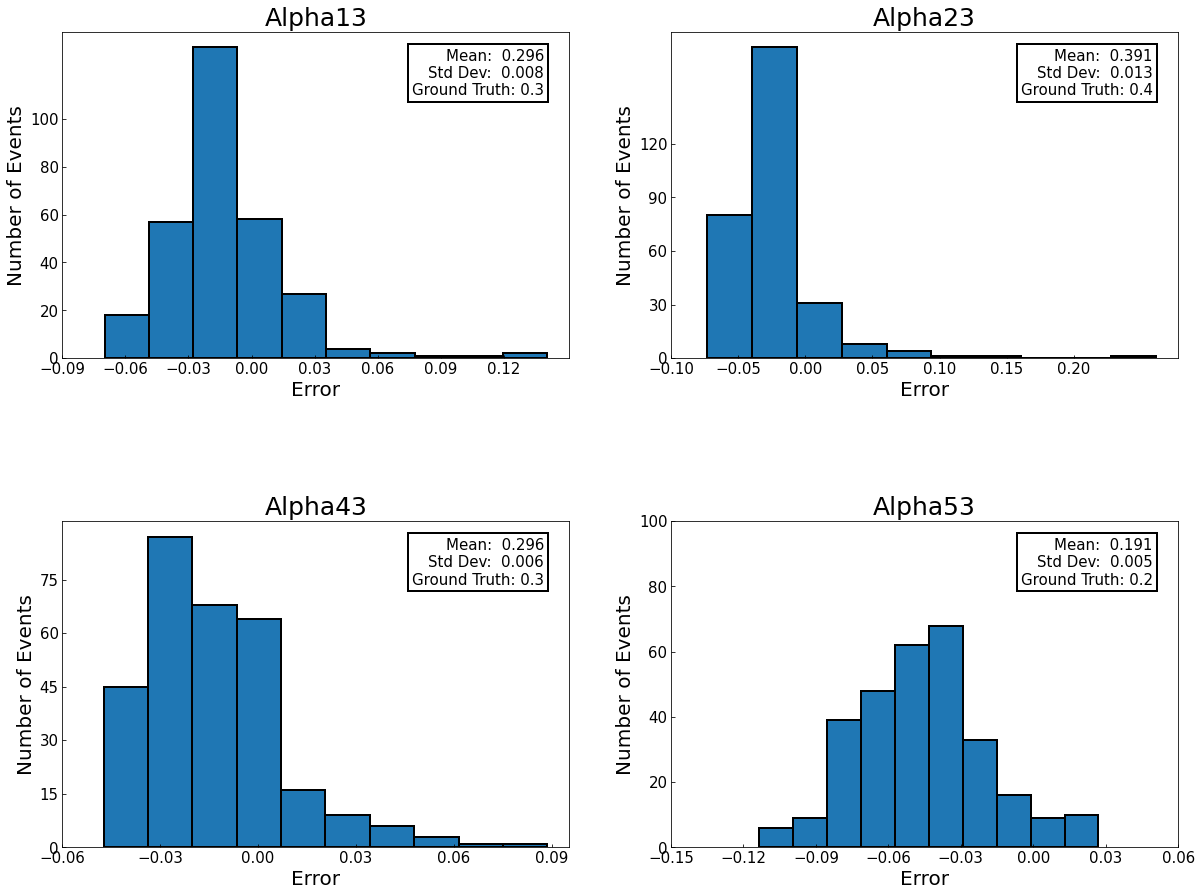

In [39]:
plt.figure(figsize=(20, 15))
plt.subplot(221)
plt.hist(a13, bins=10, range=(min(a13), max(a13)), edgecolor = 'black', linewidth = 2)
plt.title('Alpha13', size = 25)
plt.xlabel('Error', size = 20)
plt.ylabel('Number of Events', size = 20)
plt.yticks(np.arange(0, 120, 20), size = 15)
plt.xticks(np.arange(-0.09, 0.15, 0.03), size = 15)
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.text(0.95, 0.95, f'Mean: {np.mean(alpha13): .3f}\nStd Dev: {np.std(alpha13): .3f}\nGround Truth: {0.3}', 
         transform=plt.gca().transAxes, 
         fontsize=15, 
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', edgecolor = 'black', alpha = 1.0, linewidth = 2))

plt.subplot(222)
plt.hist(a23, bins=10, range=(min(a23), max(a23)), edgecolor = 'black', linewidth = 2)
plt.title('Alpha23', size = 25)
plt.xlabel('Error', size = 20)
plt.ylabel('Number of Events', size = 20)
plt.yticks(np.arange(0, 150, 30), size = 15)
plt.xticks(np.arange(-0.1, 0.25, 0.05), size = 15)
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.text(0.95, 0.95, f'Mean: {np.mean(alpha23): .3f}\nStd Dev: {np.std(alpha23): .3f}\nGround Truth: {0.4}', 
         transform=plt.gca().transAxes, 
         fontsize=15, 
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', edgecolor = 'black', alpha = 1.0, linewidth = 2))

plt.subplot(223)
plt.hist(a43, bins=10, range=(min(a43), max(a43)), edgecolor = 'black', linewidth = 2)
plt.title('Alpha43', size = 25)
plt.xlabel('Error', size = 20)
plt.ylabel('Number of Events', size = 20)
plt.yticks(np.arange(0, 80, 15), size = 15)
plt.xticks(np.arange(-0.06, 0.1, 0.03), size = 15)
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.text(0.95, 0.95, f'Mean: {np.mean(alpha43): .3f}\nStd Dev: {np.std(alpha43): .3f}\nGround Truth: {0.3}', 
         transform=plt.gca().transAxes, 
         fontsize=15, 
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', edgecolor = 'black', alpha = 1.0, linewidth = 2))

plt.subplot(224)
plt.hist(a53, bins=10, range=(min(a53), max(a53)), edgecolor = 'black', linewidth = 2)
plt.title('Alpha53', size = 25)
plt.xlabel('Error', size = 20)
plt.ylabel('Number of Events', size = 20)
plt.yticks(np.arange(0, 120, 20), size = 15)
plt.xticks(np.arange(-0.15, 0.075, 0.03), size = 15)
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.text(0.95, 0.95, f'Mean: {np.mean(alpha53): .3f}\nStd Dev: {np.std(alpha53): .3f}\nGround Truth: {0.2}', 
         transform=plt.gca().transAxes, 
         fontsize=15, 
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', edgecolor = 'black', alpha = 1.0, linewidth = 2))

plt.subplots_adjust(hspace=0.5)
plt.show()

In [40]:
a14 = [(i - 0.2) / 0.2 for i in alpha14]
a24 = [(i - 0.3) / 0.3 for i in alpha24]
a34 = [(i - 0.4) / 0.4 for i in alpha34]
a54 = [(i - 0.4) / 0.4 for i in alpha54]
print(np.mean(alpha14), np.mean(alpha24), np.mean(alpha34), np.mean(alpha54))
print(np.std(alpha14), np.std(alpha24), np.std(alpha34), np.std(alpha54))

0.20652894208186873 0.3164191686251922 0.40652522868842456 0.39727112626798816
0.04791290389417775 0.057207073037284326 0.05859097242853382 0.03563301447561316


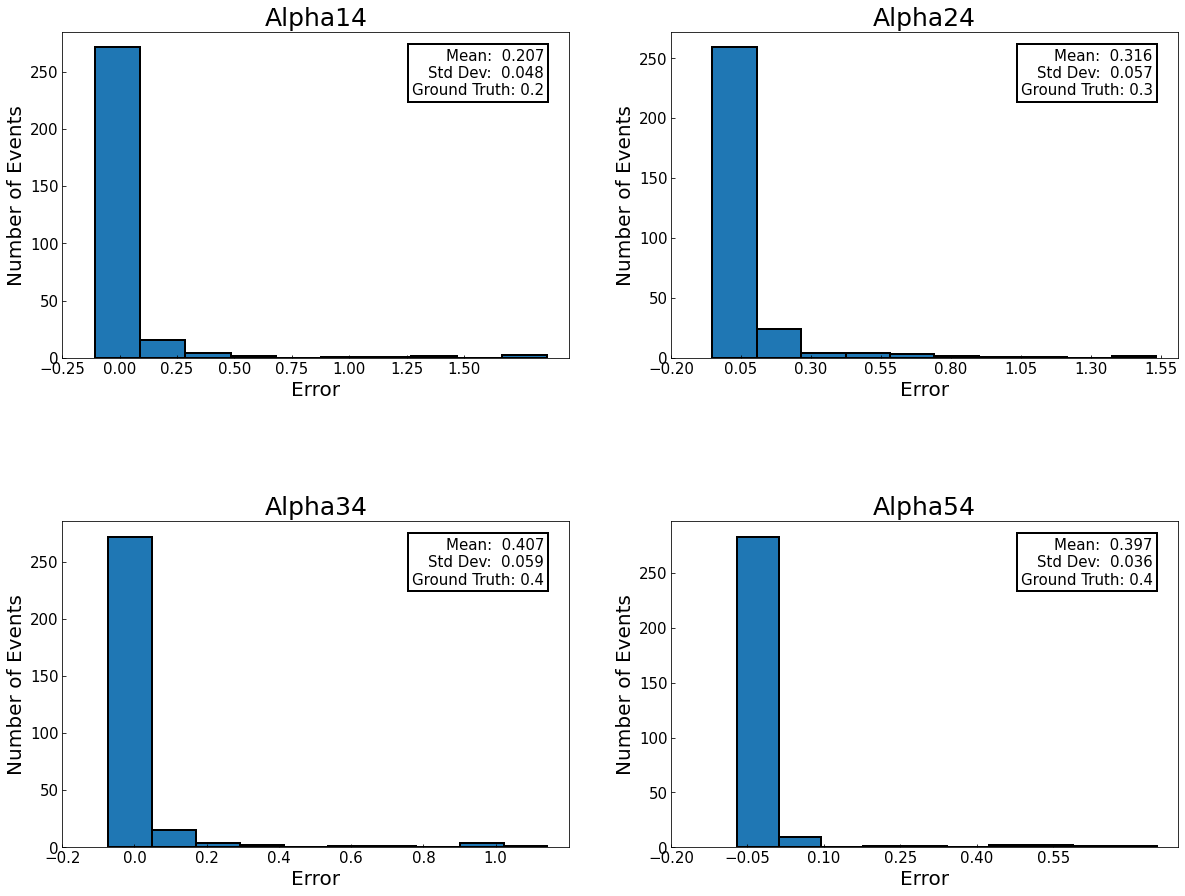

In [41]:
plt.figure(figsize=(20, 15))
plt.subplot(221)
plt.hist(a14, bins=10, range=(min(a14), max(a14)), edgecolor = 'black', linewidth = 2)
plt.title('Alpha14', size = 25)
plt.xlabel('Error', size = 20)
plt.ylabel('Number of Events', size = 20)
plt.yticks(np.arange(0, 280, 50), size = 15)
plt.xticks(np.arange(-0.25, 1.75, 0.25), size = 15)
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.text(0.95, 0.95, f'Mean: {np.mean(alpha14): .3f}\nStd Dev: {np.std(alpha14): .3f}\nGround Truth: {0.2}', 
         transform=plt.gca().transAxes, 
         fontsize=15, 
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', edgecolor = 'black', alpha = 1.0, linewidth = 2))

plt.subplot(222)
plt.hist(a24, bins=10, range=(min(a24), max(a24)), edgecolor = 'black', linewidth = 2)
plt.title('Alpha24', size = 25)
plt.xlabel('Error', size = 20)
plt.ylabel('Number of Events', size = 20)
plt.yticks(np.arange(0, 270, 50), size = 15)
plt.xticks(np.arange(-0.2, 1.6, 0.25), size = 15)
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.text(0.95, 0.95, f'Mean: {np.mean(alpha24): .3f}\nStd Dev: {np.std(alpha24): .3f}\nGround Truth: {0.3}', 
         transform=plt.gca().transAxes, 
         fontsize=15, 
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', edgecolor = 'black', alpha = 1.0, linewidth = 2))

plt.subplot(223)
plt.hist(a34, bins=10, range=(min(a34), max(a34)), edgecolor = 'black', linewidth = 2)
plt.title('Alpha34', size = 25)
plt.xlabel('Error', size = 20)
plt.ylabel('Number of Events', size = 20)
plt.yticks(np.arange(0, 280, 50), size = 15)
plt.xticks(np.arange(-0.2, 1.2, 0.2), size = 15)
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.text(0.95, 0.95, f'Mean: {np.mean(alpha34): .3f}\nStd Dev: {np.std(alpha34): .3f}\nGround Truth: {0.4}', 
         transform=plt.gca().transAxes, 
         fontsize=15, 
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', edgecolor = 'black', alpha = 1.0, linewidth = 2))

plt.subplot(224)
plt.hist(a54, bins=10, range=(min(a54), max(a54)), edgecolor = 'black', linewidth = 2)
plt.title('Alpha54', size = 25)
plt.xlabel('Error', size = 20)
plt.ylabel('Number of Events', size = 20)
plt.yticks(np.arange(0, 280, 50), size = 15)
plt.xticks(np.arange(-0.2, 0.7, 0.15), size = 15)
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.text(0.95, 0.95, f'Mean: {np.mean(alpha54): .3f}\nStd Dev: {np.std(alpha54): .3f}\nGround Truth: {0.4}', 
         transform=plt.gca().transAxes, 
         fontsize=15, 
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', edgecolor = 'black', alpha = 1.0, linewidth = 2))

plt.subplots_adjust(hspace=0.5)
plt.show()

In [42]:
a15 = [(i - 0.1) / 0.1 for i in alpha15]
a25 = [(i - 0.2) / 0.2 for i in alpha25]
a35 = [(i - 0.3) / 0.3 for i in alpha35]
a45 = [(i - 0.4) / 0.4 for i in alpha45]
print(np.mean(alpha15), np.mean(alpha25), np.mean(alpha35), np.mean(alpha45))
print(np.std(alpha15), np.std(alpha25), np.std(alpha35), np.std(alpha45))

0.09628772495207914 0.19793920204850995 0.2898142780205699 0.37826174681779623
0.010099966312182448 0.01739441007821779 0.00986841648847795 0.010506722260180306


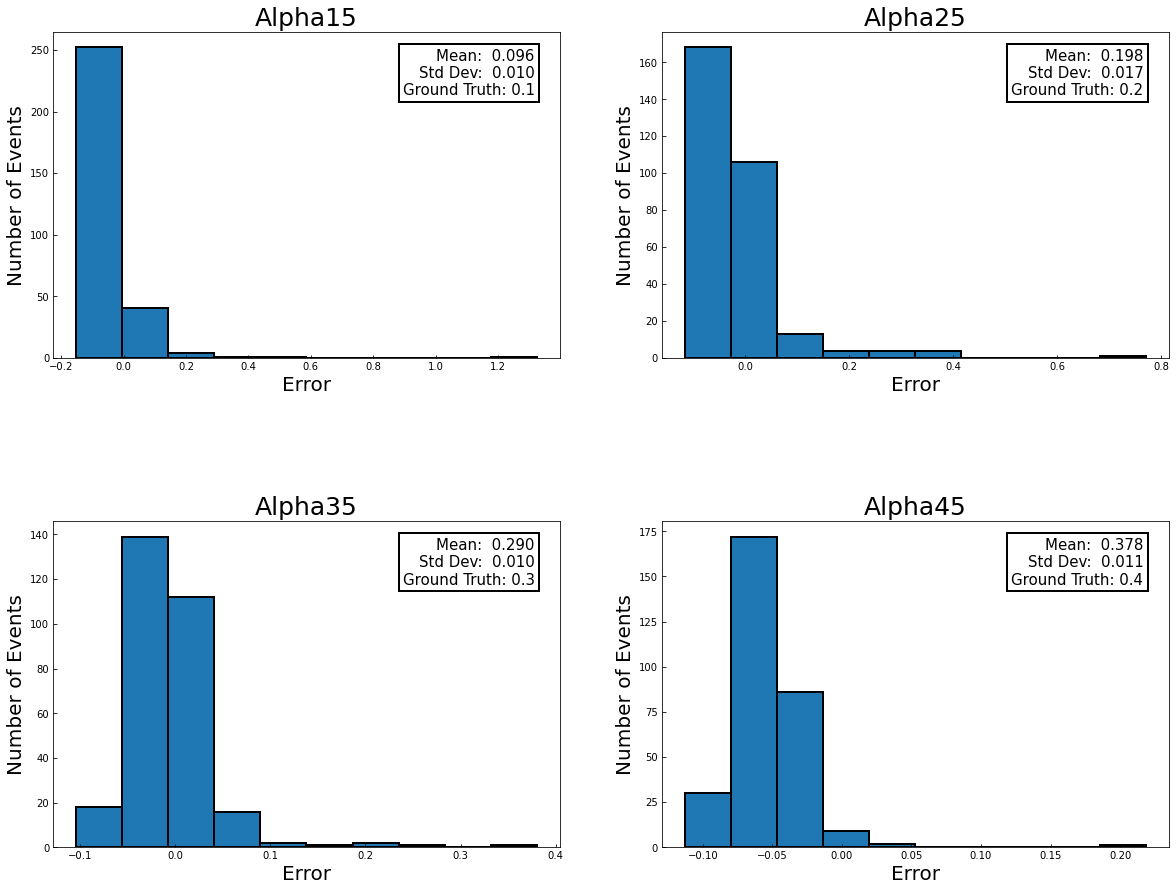

In [43]:
plt.figure(figsize=(20, 15))
plt.subplot(221)
plt.hist(a15, bins=10, range=(min(a15), max(a15)), edgecolor = 'black', linewidth = 2)
plt.title('Alpha15', size = 25)
plt.xlabel('Error', size = 20)
plt.ylabel('Number of Events', size = 20)
# plt.yticks(np.arange(0, 280, 50), size = 15)
# plt.xticks(np.arange(-0.25, 1.75, 0.25), size = 15)
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.text(0.95, 0.95, f'Mean: {np.mean(alpha15): .3f}\nStd Dev: {np.std(alpha15): .3f}\nGround Truth: {0.1}', 
         transform=plt.gca().transAxes, 
         fontsize=15, 
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', edgecolor = 'black', alpha = 1.0, linewidth = 2))

plt.subplot(222)
plt.hist(a25, bins=10, range=(min(a25), max(a25)), edgecolor = 'black', linewidth = 2)
plt.title('Alpha25', size = 25)
plt.xlabel('Error', size = 20)
plt.ylabel('Number of Events', size = 20)
# plt.yticks(np.arange(0, 270, 50), size = 15)
# plt.xticks(np.arange(-0.2, 1.6, 0.25), size = 15)
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.text(0.95, 0.95, f'Mean: {np.mean(alpha25): .3f}\nStd Dev: {np.std(alpha25): .3f}\nGround Truth: {0.2}', 
         transform=plt.gca().transAxes, 
         fontsize=15, 
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', edgecolor = 'black', alpha = 1.0, linewidth = 2))

plt.subplot(223)
plt.hist(a34, bins=10, range=(min(a35), max(a35)), edgecolor = 'black', linewidth = 2)
plt.title('Alpha35', size = 25)
plt.xlabel('Error', size = 20)
plt.ylabel('Number of Events', size = 20)
# plt.yticks(np.arange(0, 280, 50), size = 15)
# plt.xticks(np.arange(-0.2, 1.2, 0.2), size = 15)
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.text(0.95, 0.95, f'Mean: {np.mean(alpha35): .3f}\nStd Dev: {np.std(alpha35): .3f}\nGround Truth: {0.3}', 
         transform=plt.gca().transAxes, 
         fontsize=15, 
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', edgecolor = 'black', alpha = 1.0, linewidth = 2))

plt.subplot(224)
plt.hist(a45, bins=10, range=(min(a45), max(a45)), edgecolor = 'black', linewidth = 2)
plt.title('Alpha45', size = 25)
plt.xlabel('Error', size = 20)
plt.ylabel('Number of Events', size = 20)
# plt.yticks(np.arange(0, 280, 50), size = 15)
# plt.xticks(np.arange(-0.2, 0.7, 0.15), size = 15)
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.text(0.95, 0.95, f'Mean: {np.mean(alpha45): .3f}\nStd Dev: {np.std(alpha45): .3f}\nGround Truth: {0.4}', 
         transform=plt.gca().transAxes, 
         fontsize=15, 
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', edgecolor = 'black', alpha = 1.0, linewidth = 2))

plt.subplots_adjust(hspace=0.5)
plt.show()

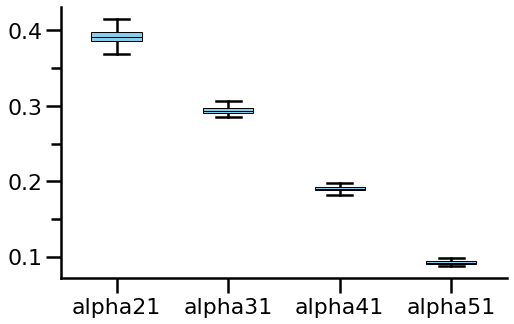

In [46]:
fig, ax = plt.subplots(figsize = (8, 5))


boxprops = dict(facecolor='skyblue', color='black')
whiskerprops = dict(color='black', linewidth=2.5)
capprops = dict(color='black', linewidth=2.5)
medianprops = dict(color='black')
flierprops = dict(marker='o', markersize=5, markerfacecolor='red')

ax.boxplot([alpha21, alpha31, alpha41, alpha51], patch_artist=True, 
           boxprops=boxprops,
           whiskerprops=whiskerprops,
           capprops=capprops,
           medianprops=medianprops,
           flierprops=flierprops,
           showfliers=False
           )

ax.set_xticklabels(['alpha21', 'alpha31', 'alpha41', 'alpha51'], fontsize = 22)
# ax.set_xticklabels('')
ax.tick_params(axis='y', labelsize=22)
ax.set_xlabel('')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.tick_params(axis='both', which='major', length=15, width=2.5, direction='out')
ax.tick_params(axis='both', which='minor', length=10, width=2.5, direction='out')  


from matplotlib.ticker import AutoMinorLocator

ax.yaxis.set_minor_locator(AutoMinorLocator(2)) 
# ax.set_ylabel('Value', fontsize = 20)
# ax.set_title('Box Plot', fontsize = 20)
props = dict(boxstyle='round, pad = 0.2', facecolor='white')

# summary_text = f"""
# Ground Truth Value:
# alpha21: 0.4
# alpha31: 0.3
# alpha41: 0.2
# alpha51: 0.1
# """
# 
# ax.text(0.65, 1.05, summary_text, transform=ax.transAxes, fontsize=15,
#         verticalalignment='top', bbox = props)

plt.show()

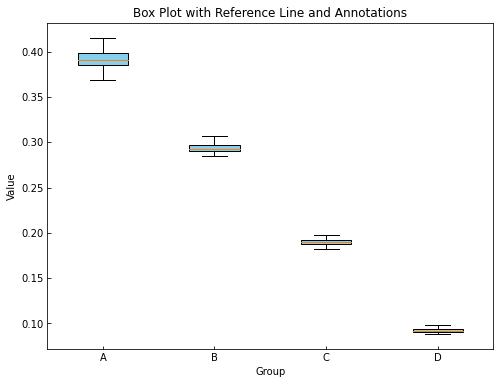

In [47]:
import matplotlib.pyplot as plt
import numpy as np


# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create box plots
ax.boxplot([alpha21, alpha31, alpha41, alpha51], patch_artist=True, boxprops=dict(facecolor='skyblue'), showfliers=False)

# Customize the plot
ax.set_title('Box Plot with Reference Line and Annotations')
ax.set_xlabel('Group')
ax.set_ylabel('Value')
ax.set_xticklabels(['A', 'B', 'C', 'D'])

# Show the plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Sample data generation (replace this with your data)
data = np.random.normal(loc=50, scale=5, size=1000)

# Plot histogram
plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='grey')

# Fit a normal distribution to the data
mu, std = norm.fit(data)

# Plot the PDF over the histogram
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)

# Add title and labels
plt.title(f"Histogram and Normal Distribution Fit: μ = {mu:.2f}, σ = {std:.2f}")
plt.xlabel('Data Values')
plt.ylabel('Density')

# Show plot
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (8, 5))


boxprops = dict(facecolor='orange', color='black')
whiskerprops = dict(color='black', linewidth=2.5)
capprops = dict(color='black', linewidth=2.5)
medianprops = dict(color='black')
flierprops = dict(marker='o', markersize=5, markerfacecolor='red')

ax.boxplot([alpha12, alpha32, alpha42, alpha52], patch_artist=True, 
           boxprops=boxprops,
           whiskerprops=whiskerprops,
           capprops=capprops,
           medianprops=medianprops,
           flierprops=flierprops,
           showfliers=False
           )

ax.set_xticklabels(['alpha12', 'alpha32', 'alpha42', 'alpha52'], fontsize = 22)
# ax.set_xticklabels('')
ax.tick_params(axis='y', labelsize=22)
ax.set_xlabel('')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.tick_params(axis='both', which='major', length=15, width=2.5, direction='out')
ax.tick_params(axis='both', which='minor', length=10, width=2.5, direction='out')  

from matplotlib.ticker import AutoMinorLocator

ax.yaxis.set_minor_locator(AutoMinorLocator(2)) 
# ax.set_ylabel('Value', fontsize = 20)
# ax.set_title('Box Plot', fontsize = 20)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (8, 5))


boxprops = dict(facecolor='orange', color='black')
whiskerprops = dict(color='black', linewidth=2.5)
capprops = dict(color='black', linewidth=2.5)
medianprops = dict(color='black')
flierprops = dict(marker='o', markersize=5, markerfacecolor='red')

ax.boxplot([alpha13, alpha23, alpha43, alpha53], patch_artist=True, 
           boxprops=boxprops,
           whiskerprops=whiskerprops,
           capprops=capprops,
           medianprops=medianprops,
           flierprops=flierprops,
           showfliers=False
           )

ax.set_xticklabels(['alpha13', 'alpha23', 'alpha43', 'alpha53'], fontsize = 22)
# ax.set_xticklabels('')
ax.tick_params(axis='y', labelsize=22)
ax.set_xlabel('')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.tick_params(axis='both', which='major', length=15, width=2.5, direction='out')
ax.tick_params(axis='both', which='minor', length=10, width=2.5, direction='out')  

from matplotlib.ticker import AutoMinorLocator

ax.yaxis.set_minor_locator(AutoMinorLocator(2)) 
# ax.set_ylabel('Value', fontsize = 20)
# ax.set_title('Box Plot', fontsize = 20)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (8, 5))


boxprops = dict(facecolor='orange', color='black')
whiskerprops = dict(color='black', linewidth=2.5)
capprops = dict(color='black', linewidth=2.5)
medianprops = dict(color='black')
flierprops = dict(marker='o', markersize=5, markerfacecolor='red')

ax.boxplot([alpha14, alpha24, alpha34, alpha54], patch_artist=True, 
           boxprops=boxprops,
           whiskerprops=whiskerprops,
           capprops=capprops,
           medianprops=medianprops,
           flierprops=flierprops,
           showfliers=False
           )

ax.set_xticklabels(['alpha14', 'alpha24', 'alpha34', 'alpha54'], fontsize = 22)
# ax.set_xticklabels('')
ax.tick_params(axis='y', labelsize=22)
ax.set_xlabel('')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.tick_params(axis='both', which='major', length=15, width=2.5, direction='out')
ax.tick_params(axis='both', which='minor', length=10, width=2.5, direction='out')  

from matplotlib.ticker import AutoMinorLocator

ax.yaxis.set_minor_locator(AutoMinorLocator(2)) 
# ax.set_ylabel('Value', fontsize = 20)
# ax.set_title('Box Plot', fontsize = 20)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (8, 5))

boxprops = dict(facecolor='orange', color='black')
whiskerprops = dict(color='black', linewidth=2.5)
capprops = dict(color='black', linewidth=2.5)
medianprops = dict(color='black')
flierprops = dict(marker='o', markersize=5, markerfacecolor='red')

ax.boxplot([alpha15, alpha25, alpha35, alpha45], patch_artist=True, 
           boxprops=boxprops,
           whiskerprops=whiskerprops,
           capprops=capprops,
           medianprops=medianprops,
           flierprops=flierprops,
           showfliers=False
           )

ax.set_xticklabels(['alpha15', 'alpha25', 'alpha35', 'alpha45'], fontsize = 22)
# ax.set_xticklabels('')
ax.tick_params(axis='y', labelsize=22)
ax.set_xlabel('')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.tick_params(axis='both', which='major', length=15, width=2.5, direction='out')
ax.tick_params(axis='both', which='minor', length=10, width=2.5, direction='out')  

from matplotlib.ticker import AutoMinorLocator

ax.yaxis.set_minor_locator(AutoMinorLocator(2)) 
# ax.set_ylabel('Value', fontsize = 20)
# ax.set_title('Box Plot', fontsize = 20)

plt.show()

In [ ]:
matrix = np.array([[1, 0.4, 0.3, 0.2, 0.1], [0.4, 1, 0.4, 0.3, 0.2], [0.3, 0.3, 1, 0.4, 0.3], [0.2, 0.2, 0.3, 1, 0.4], [0.1, 0.1, 0.2, 0.4, 1]])
inv_matrix = np.linalg.pinv(matrix)

print(matrix, '\n', inv_matrix)

In [ ]:
cal_matrix = np.array([[1, np.mean(alpha12), np.mean(alpha13), np.mean(alpha14), np.mean(alpha15)], [np.mean(alpha21), 1, np.mean(alpha23), np.mean(alpha24), np.mean(alpha25)], [np.mean(alpha31), np.mean(alpha32), 1, np.mean(alpha34), np.mean(alpha35)], [np.mean(alpha41), np.mean(alpha42), np.mean(alpha43), 1, np.mean(alpha45)], [np.mean(alpha51), np.mean(alpha52), np.mean(alpha53), np.mean(alpha54), 1]])

inv_cal_matrix = np.linalg.inv(cal_matrix)

In [ ]:
corrected_img1 = inv_cal_matrix[0, 0] * img1_noise + inv_cal_matrix[0, 1] * img2_noise + inv_cal_matrix[0, 2] * img3_noise + inv_cal_matrix[0, 3] * img4_noise + inv_cal_matrix[0, 4] * img5_noise
corrected_img1[corrected_img1 < 0] = 0

plt.figure(figsize=(8, 8))
plt.imshow(corrected_img1, cmap = red_cmap)
plt.axis('off')
plt.show()

In [ ]:
from scipy.stats import pearsonr

result = pearsonr(new1_noise.flatten(), np.uint8(corrected_img1).flatten())[0]

result

In [ ]:
plt.figure(figsize=(8, 8))
plt.imshow(new2_noise, cmap = green_cmap)
plt.axis('off')
plt.show()

In [ ]:
corrected_img2 = inv_cal_matrix[1, 0] * img1_noise + inv_cal_matrix[1, 1] * img2_noise + inv_cal_matrix[1, 2] * img3_noise + inv_cal_matrix[1, 3] * img4_noise + inv_cal_matrix[1, 4] * img5_noise
corrected_img2[corrected_img2 < 0] = 0

plt.figure(figsize=(8, 8))
plt.imshow(new2_noise, cmap = green_cmap)
plt.axis('off')
plt.show()

In [ ]:
pearsonr(new2_noise.flatten(), np.uint8(corrected_img2).flatten())[0]

In [ ]:
corrected_img3 = inv_cal_matrix[2, 0] * img1_noise + inv_cal_matrix[2, 1] * img2_noise + inv_cal_matrix[2, 2] * img3_noise + inv_cal_matrix[2, 3] * img4_noise + inv_cal_matrix[2, 4] * img5_noise
corrected_img3[corrected_img3 < 0] = 0

plt.figure(figsize=(8, 8))
plt.imshow(corrected_img3, cmap = yellow_cmap)
plt.axis('off')
plt.show()

In [ ]:
pearsonr(new3_noise.flatten(), np.uint8(corrected_img3).flatten())[0]

In [ ]:
corrected_img4 = inv_cal_matrix[3, 0] * img1_noise + inv_cal_matrix[3, 1] * img2_noise + inv_cal_matrix[3, 2] * img3_noise + inv_cal_matrix[3, 3] * img4_noise + inv_cal_matrix[3, 4] * img5_noise
corrected_img4[corrected_img4 < 0] = 0

plt.figure(figsize=(8, 8))
plt.imshow(corrected_img4, cmap = orange_cmap)
plt.axis('off')
plt.show()

In [ ]:
pearsonr(new4_noise.flatten(), np.uint8(corrected_img4).flatten())[0]

In [ ]:
corrected_img5 = inv_cal_matrix[4, 0] * img1_noise + inv_cal_matrix[4, 1] * img2_noise + inv_cal_matrix[4, 2] * img3_noise + inv_cal_matrix[4, 3] * img4_noise + inv_cal_matrix[4, 4] * img5_noise
corrected_img5[corrected_img5 < 0] = 0

plt.figure(figsize=(8, 8))
plt.imshow(corrected_img5, cmap = blue_cmap)
plt.axis('off')
plt.show()

In [ ]:
pearsonr(new5_noise.flatten(), np.uint8(corrected_img5).flatten())[0]

In [ ]:
plt.imshow(corrected_img1 + corrected_img2 + corrected_img3 + corrected_img4 + corrected_img5)
plt.show()